#### M25-514. Kirgizov T. K.

### <b>Mahalanobis distance-based classifier</b>


1. <h4>Рассчитать расстояния Махаланобиса от каждой точки до каждого из классов при различных предположениях, визуализировать матрицы для каждого случая:</h4>

- <b>а) ковариационные матрицы всех классов равные, скалярные;</b>
- <b>б) равные, диагональные;</b>
- <b>в) различные, скалярные;</b>
- <b>г) различные, диагональные;</b>
- <b>д) равные;</b>
- <b>е) различные.</b>

2. <h4>Построить диаграммы рассеяния расстояний 
   (по оси абсцисс 1 – расстояние до положительного класса (с меткой +1), по оси ординат 2 – до отрицательного класса) для каждого случая.</h4>
3. <h4>Нанести на диаграмму прямую 1 = 2.</h4>
4. <h4>Построить гистограммы распределения расстояний данных каждого класса до положительного класса для случаев а)–е).</h4>


In [218]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    cohen_kappa_score,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
)
from typing import Literal

plt.style.use("ggplot")

In [219]:
data = pd.read_csv("data_ml_v2-08.csv")

print(data.head())


# Разделение на признаки и метки
X = data[["x1", "x2"]].values
y = data["label"].values

print('\nКоличество точек "1" класса:', np.sum(y == 1))
print('Количество точек "-1" класса:', np.sum(y == -1))

        x1       x2  label
0  0.70634  0.21803     -1
1 -0.66430 -0.85485     -1
2  4.13300  1.36860     -1
3  1.26960 -2.70480     -1
4  2.84010  2.26230     -1

Количество точек "1" класса: 150
Количество точек "-1" класса: 200


In [220]:
# Holdout 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y,
)

print(f"Обучающая выборка: {X_train.shape[0]} точек")
print(f"Тестовая выборка: {X_test.shape[0]} точек")

X_train_negative = X_train[y_train == -1]
X_train_positive = X_train[y_train == 1]

print(f'\nОбучающая выборка "-1" класса: {X_train_negative.shape[0]} точек')
print(f'Обучающая выборка "1" класса: {X_train_positive.shape[0]} точек')

Обучающая выборка: 245 точек
Тестовая выборка: 105 точек

Обучающая выборка "-1" класса: 140 точек
Обучающая выборка "1" класса: 105 точек


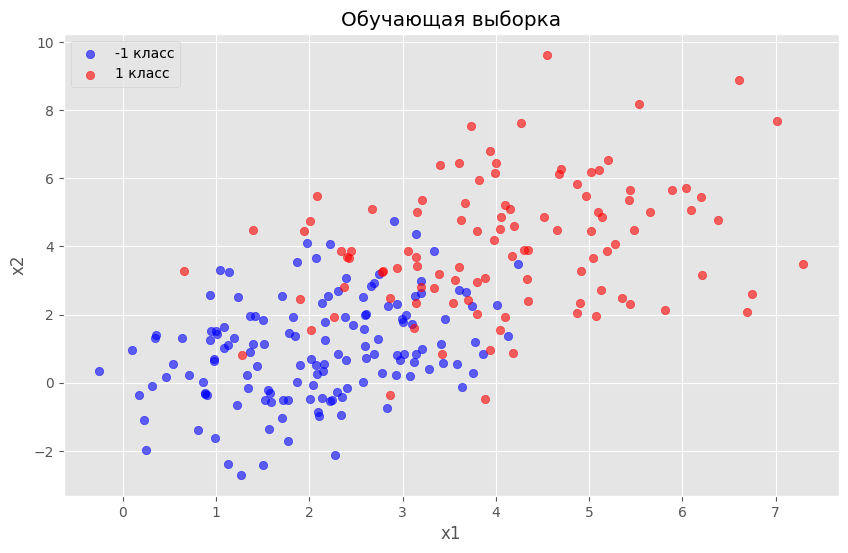

In [221]:
# Визуализация обучающей выборки
plt.figure(figsize=(10, 6))
plt.scatter(
    X_train_negative[:, 0],
    X_train_negative[:, 1],
    c="blue",
    label="-1 класс",
    alpha=0.6,
)
plt.scatter(
    X_train_positive[:, 0],
    X_train_positive[:, 1],
    c="red",
    label="1 класс",
    alpha=0.6,
)
plt.title("Обучающая выборка")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [222]:
mu_negative = np.mean(X_train_negative, axis=0)
mu_positive = np.mean(X_train_positive, axis=0)

# Средние значения признаков для каждого класса
print(f"Среднее значение (μ₋) для '-1' класса: {mu_negative}")
print(f"Среднее значение (μ₊) для '1' класса: {mu_positive}")

# Полные ковариационные матрицы Σ = (X - μ)ᵀ(X - μ) / n
sigma_negative_full = np.cov(X_train_negative.T)
sigma_positive_full = np.cov(X_train_positive.T)

print("\nПолная ковариационная матрица для '-1' класса:")
print(sigma_negative_full)
print("\nПолная ковариационная матрица для '1' класса:")
print(sigma_positive_full)

Среднее значение (μ₋) для '-1' класса: [2.06757609 0.95602764]
Среднее значение (μ₊) для '1' класса: [4.12222648 4.06474257]

Полная ковариационная матрица для '-1' класса:
[[0.98241008 0.48693818]
 [0.48693818 2.20696524]]

Полная ковариационная матрица для '1' класса:
[[1.77902869 0.71335945]
 [0.71335945 3.59618468]]


In [223]:
def create_scalar_matrix(X):
    """Создает скалярную матрицу для заданной выборки X."""
    variance = np.var(X, axis=0, ddof=1)
    sigma_square = np.mean(variance)
    return sigma_square * np.eye(2)  # единичная матрица 2x2

In [224]:
def create_diagonal_matrix(X):
    """Создает диагональную матрицу для заданной выборки X."""
    variance = np.var(X, axis=0, ddof=1)
    return np.diag(variance)

#### Случай (а)

##### Матрицы - равные, скалярные:

$$\Sigma_1 = \Sigma_2 = \sigma^2 I = \begin{bmatrix} \sigma^2 & 0 \\ 0 & \sigma^2 \end{bmatrix}$$

- Оба класса имеют одинаковую матрицу</h5>
- Матрица скалярная: дисперсии по всем осям равны</h5>
- Нет корреляции между признаками</h5>
- Сферическое распределение</h5>

Граница - линейная

##### Формула для средней дисперсии:

$$\sigma = \frac{\sigma_1^2 + \sigma_2^2}{2}$$


In [225]:
print("Случай (а): Ковариационные матрицы - равные, скалярные\n")

X_train_combined = np.vstack([X_train_negative, X_train_positive])
Sigma_a = create_scalar_matrix(X_train_combined)
Sigma_neg_a = Sigma_a.copy()
Sigma_pos_a = Sigma_a.copy()


print("Σₐ (общая для обоих классов):")
print(Sigma_a)

Случай (а): Ковариационные матрицы - равные, скалярные

Σₐ (общая для обоих классов):
[[3.76124419 0.        ]
 [0.         3.76124419]]


#### Случай (б)

##### Матрицы - равные, диагональные:

$$\Sigma_1 = \Sigma_2 = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_2^2 \end{bmatrix}$$

- Оба класса имеют одинаковую матрицу
- Дисперсии по x₁ и x₂ могут быть разными
- Нет корреляции (диагональная матрица)
- Эллипсоид вдоль осей координат

##### Учитываем разные дисперсии по осям x1 и x2, но игнорируем корреляцию между ними.


In [226]:
print("Случай (б): Ковариационные матрицы - равные, диагональные\n")

Sigma_b = create_diagonal_matrix(X_train_combined)

Sigma_neg_b = Sigma_b.copy()
Sigma_pos_b = Sigma_b.copy()

print("Σᵦ (общая для обоих классов):")
print(Sigma_b)

Случай (б): Ковариационные матрицы - равные, диагональные

Σᵦ (общая для обоих классов):
[[2.35602163 0.        ]
 [0.         5.16646676]]


#### Случай (в)

##### Матрицы - различные, скалярные:

$$\Sigma_1 = \sigma_1^2 I, \quad \Sigma_2 = \sigma_2^2 I$$

- Каждый класс имеет свою матрицу
- Обе матрицы скалярные, но с разными σ²
- Нет корреляции
- Сферы разного радиуса

##### Граница классов: квадратичная (может быть окружностью)


In [227]:
print("Случай (в): Ковариационные матрицы - различные, скалярные\n")

Sigma_neg_c = create_scalar_matrix(X_train_negative)
Sigma_pos_c = create_scalar_matrix(X_train_positive)

print("Σ₋ (класс -1):")
print(Sigma_neg_c)
print("\nΣ₊ (класс +1):")
print(Sigma_pos_c)

Случай (в): Ковариационные матрицы - различные, скалярные

Σ₋ (класс -1):
[[1.59468766 0.        ]
 [0.         1.59468766]]

Σ₊ (класс +1):
[[2.68760669 0.        ]
 [0.         2.68760669]]


#### Случай (г):

##### Матрицы - различные, диагональные:

$$\Sigma_1 = \begin{bmatrix} \sigma_{11}^2 & 0 \\ 0 & \sigma_{12}^2 \end{bmatrix}, \quad \Sigma_2 = \begin{bmatrix} \sigma_{21}^2 & 0 \\ 0 & \sigma_{22}^2 \end{bmatrix}$$

- Каждый класс имеет свою диагональную матрицу
- Нет корреляции, но дисперсии разные для каждого класса
- Разные эллипсоиды вдоль осей

##### Граница классов: квадратичная


In [228]:
print("Случай (г): Ковариационные матрицы - различные, диагональные\n")

Sigma_neg_g = create_diagonal_matrix(X_train_negative)
Sigma_pos_g = create_diagonal_matrix(X_train_positive)

print("Σ₋ (класс -1):")
print(Sigma_neg_g)
print("\nΣ₊ (класс +1):")
print(Sigma_pos_g)

Случай (г): Ковариационные матрицы - различные, диагональные

Σ₋ (класс -1):
[[0.98241008 0.        ]
 [0.         2.20696524]]

Σ₊ (класс +1):
[[1.77902869 0.        ]
 [0.         3.59618468]]


#### Случай (д):

##### Матрицы - равные полные:

$$\Sigma_1 = \Sigma_2 = \begin{bmatrix} \sigma_1^2 & \rho\sigma_1\sigma_2 \\ \rho\sigma_1\sigma_2 & \sigma_2^2 \end{bmatrix}$$

- Оба класса имеют одинаковую полную матрицу
- Есть корреляция (ρ ≠ 0)
- Одинаковые повёрнутые эллипсоиды

##### Граница классов: линейнаяя


In [229]:
print("Случай (д): Ковариационные матрицы - равные полные\n")

Sigma_d = np.cov(X_train_combined.T)
Sigma_neg_d = Sigma_d.copy()
Sigma_pos_d = Sigma_d.copy()

print("Σ_d (общая полная матрица):")
print(Sigma_d)

Случай (д): Ковариационные матрицы - равные полные

Σ_d (общая полная матрица):
[[2.35602163 2.152103  ]
 [2.152103   5.16646676]]


### Случай (е):

##### Матрицы - различные полные:

$$\Sigma_1 \neq \Sigma_2 \quad \text{(обе полные матрицы)}$$

- Каждый класс имеет свою полную матрицу
- Есть корреляция, разная для каждого класса
- Разные повёрнутые эллипсоиды
- Самый общий случай

Граница классов: квадратичная (может быть гиперболой, параболой и т.д.)


In [230]:
print("Случай (е): Ковариационные матрицы различные полные\n")


Sigma_neg_e = sigma_negative_full.copy()
Sigma_pos_e = sigma_positive_full.copy()

print("Σ₋ (класс -1, полная):")
print(Sigma_neg_e)
print("\nΣ₊ (класс +1, полная):")
print(Sigma_pos_e)

Случай (е): Ковариационные матрицы различные полные

Σ₋ (класс -1, полная):
[[0.98241008 0.48693818]
 [0.48693818 2.20696524]]

Σ₊ (класс +1, полная):
[[1.77902869 0.71335945]
 [0.71335945 3.59618468]]


### Расстояние Махаланобиса

**Расстояние Махаланобиса** — это мера расстояния между точкой и распределением данных, которая учитывает:

1. **Ковариацию между признаками** (корреляцию)
2. **Различия в масштабе** (дисперсии по разным осям)

Расстояние Махаланобиса от точки **x** до распределения с центром **μ** и ковариационной матрицей **Σ**:

$$D^2(x) = (x - \mu)^T \Sigma^{-1} (x - \mu)$$

$$D(x) = \sqrt{D^2(x)}$$

Где:

- **x** — вектор признаков точки (размерность d)
- **μ** — вектор средних значений класса (центр распределения)
- **Σ** — ковариационная матрица класса (d × d)
- **Σ⁻¹** — обратная ковариационная матрица
- **T** — операция транспонирования


In [231]:
def mahalanobis_distance(X: np.ndarray, mu: np.ndarray, Sigma: np.ndarray) -> float:
    """Вычисляет расстояние Махаланобиса для точки x.

    Параметры:
    X: np.ndarray - массив точек, для которых вычисляется расстояние
    mu: np.ndarray - вектор средних значений распределения
    Sigma: np.ndarray - ковариационная матрица

    Возвращает:
    float - расстояние Махаланобиса
    """
    try:
        Sigma_inv = np.linalg.inv(Sigma)  # Вычисление обратной матрицы
    except np.linalg.LinAlgError:
        print("Матрица вырождена - не имеет обратной матрицы, добавляем регуляризацию")
        Sigma_inv = np.linalg.inv(Sigma + 1e-6 * np.eye(Sigma.shape[0]))

    X_centered = X - mu  # (x - mu) в формуле

    # D^2(x) = (x - mu)^T * Sigma^-1 * (x - mu)
    distances_squared = np.sum(X_centered @ Sigma_inv * X_centered, axis=1)

    return np.sqrt(distances_squared)  # D(x) = sqrt(D^2(x))

In [232]:
"""Задание хеш таблицы для каждого случая."""

CASES = {
    "a": {
        "name": "Равные, скалярные",
        "Sigma_negative": Sigma_neg_a,
        "Sigma_positive": Sigma_pos_a,
    },
    "b": {
        "name": "Равные, диагональные",
        "Sigma_negative": Sigma_neg_b,
        "Sigma_positive": Sigma_pos_b,
    },
    "c": {
        "name": "Различные, скалярные",
        "Sigma_negative": Sigma_neg_c,
        "Sigma_positive": Sigma_pos_c,
    },
    "g": {
        "name": "Различные, диагональные",
        "Sigma_negative": Sigma_neg_g,
        "Sigma_positive": Sigma_pos_g,
    },
    "d": {
        "name": "Равные полные",
        "Sigma_negative": Sigma_neg_d,
        "Sigma_positive": Sigma_pos_d,
    },
    "e": {
        "name": "Различные полные",
        "Sigma_negative": Sigma_neg_e,
        "Sigma_positive": Sigma_pos_e,
    },
}

In [233]:
for case_name, case_data in CASES.items():
    dist_train_to_neg = mahalanobis_distance(
        X_train,
        mu_negative,
        case_data["Sigma_negative"],
    )
    dist_train_to_pos = mahalanobis_distance(
        X_train,
        mu_positive,
        case_data["Sigma_positive"],
    )
    dist_test_to_neg = mahalanobis_distance(
        X_test,
        mu_negative,
        case_data["Sigma_negative"],
    )
    dist_test_to_pos = mahalanobis_distance(
        X_test,
        mu_positive,
        case_data["Sigma_positive"],
    )
    case_data["train_dist_neg"] = dist_train_to_neg
    case_data["train_dist_pos"] = dist_train_to_pos
    case_data["test_dist_neg"] = dist_test_to_neg
    case_data["test_dist_pos"] = dist_test_to_pos

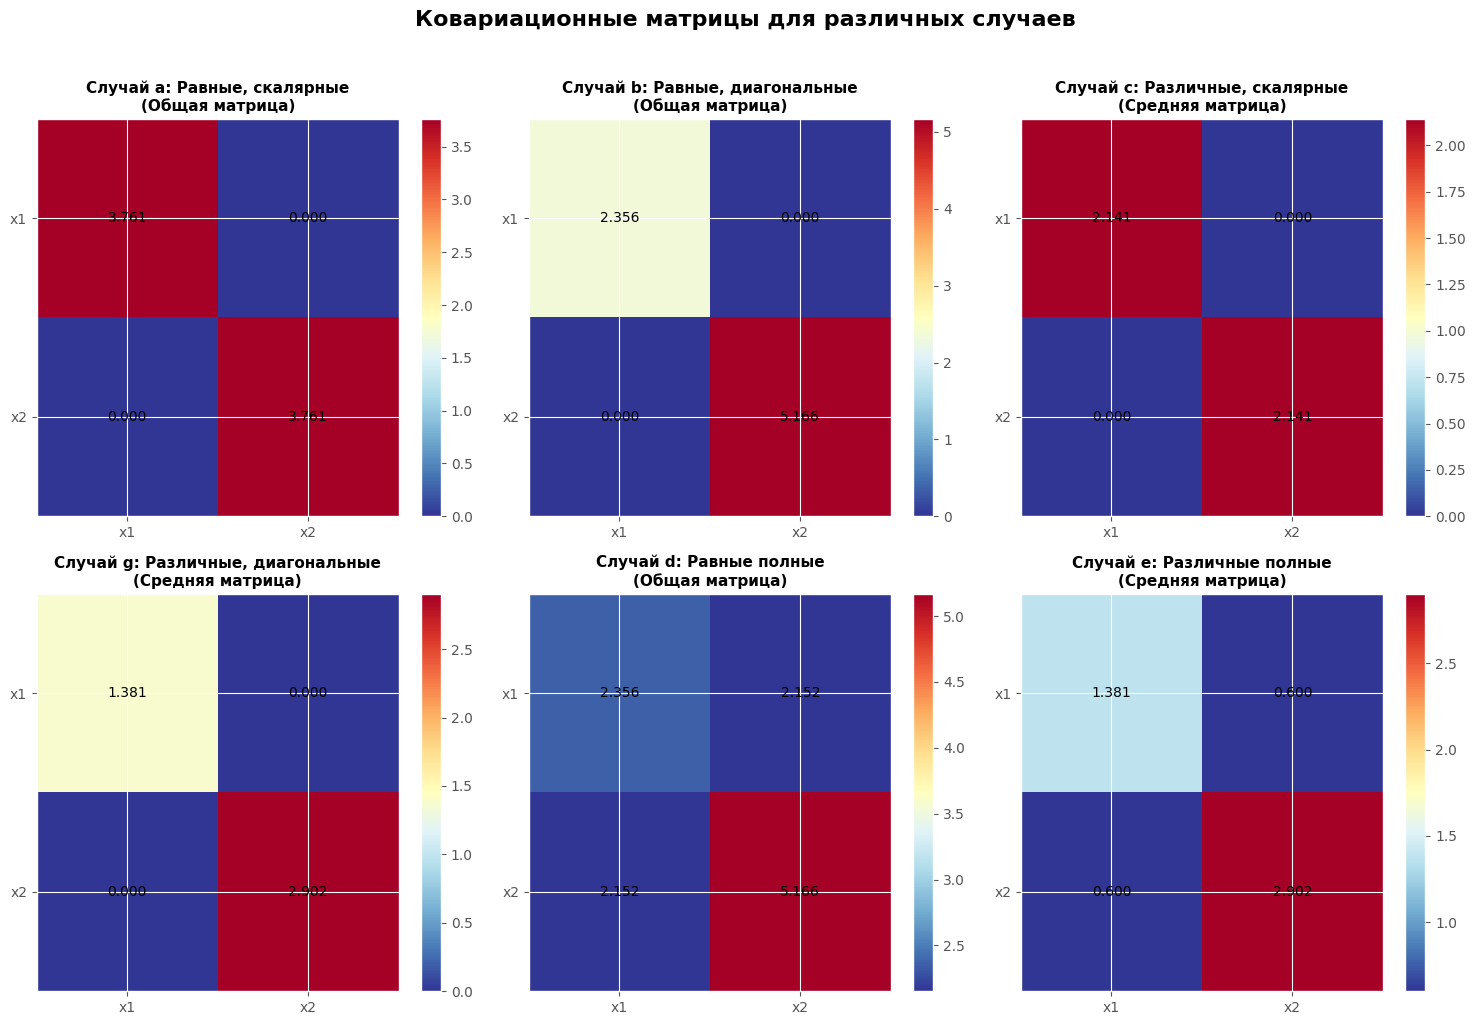

In [234]:
"""Визуализация ковариационных матриц"""

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(
    "Ковариационные матрицы для различных случаев",
    fontsize=16,
    fontweight="bold",
    y=1.02,
)

case_letters = list(CASES.keys())

for index, (case_name, case_data) in enumerate(CASES.items()):
    row = index // 3
    col = index % 3
    ax = axes[row, col]

    if np.allclose(case_data["Sigma_negative"], case_data["Sigma_positive"]):
        matr_to_plot = case_data["Sigma_negative"]
        title = f"Случай {case_name}: {case_data['name']}\n(Общая матрица)"
    else:
        matr_to_plot = (case_data["Sigma_negative"] + case_data["Sigma_positive"]) / 2
        title = f"Случай {case_name}: {case_data['name']}\n(Средняя матрица)"

    im = ax.imshow(matr_to_plot, cmap="RdYlBu_r", aspect="auto")
    ax.set_title(title, fontsize=11, fontweight="bold")
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["x1", "x2"])
    ax.set_yticklabels(["x1", "x2"])

    for i in range(2):
        for j in range(2):
            text = ax.text(
                j,
                i,
                f"{matr_to_plot[i, j]:.3f}",
                ha="center",
                va="center",
                color="black",
                fontsize=10,
            )

    plt.colorbar(im, ax=ax)


plt.tight_layout()
plt.savefig("cov_matrices.png")
plt.show()

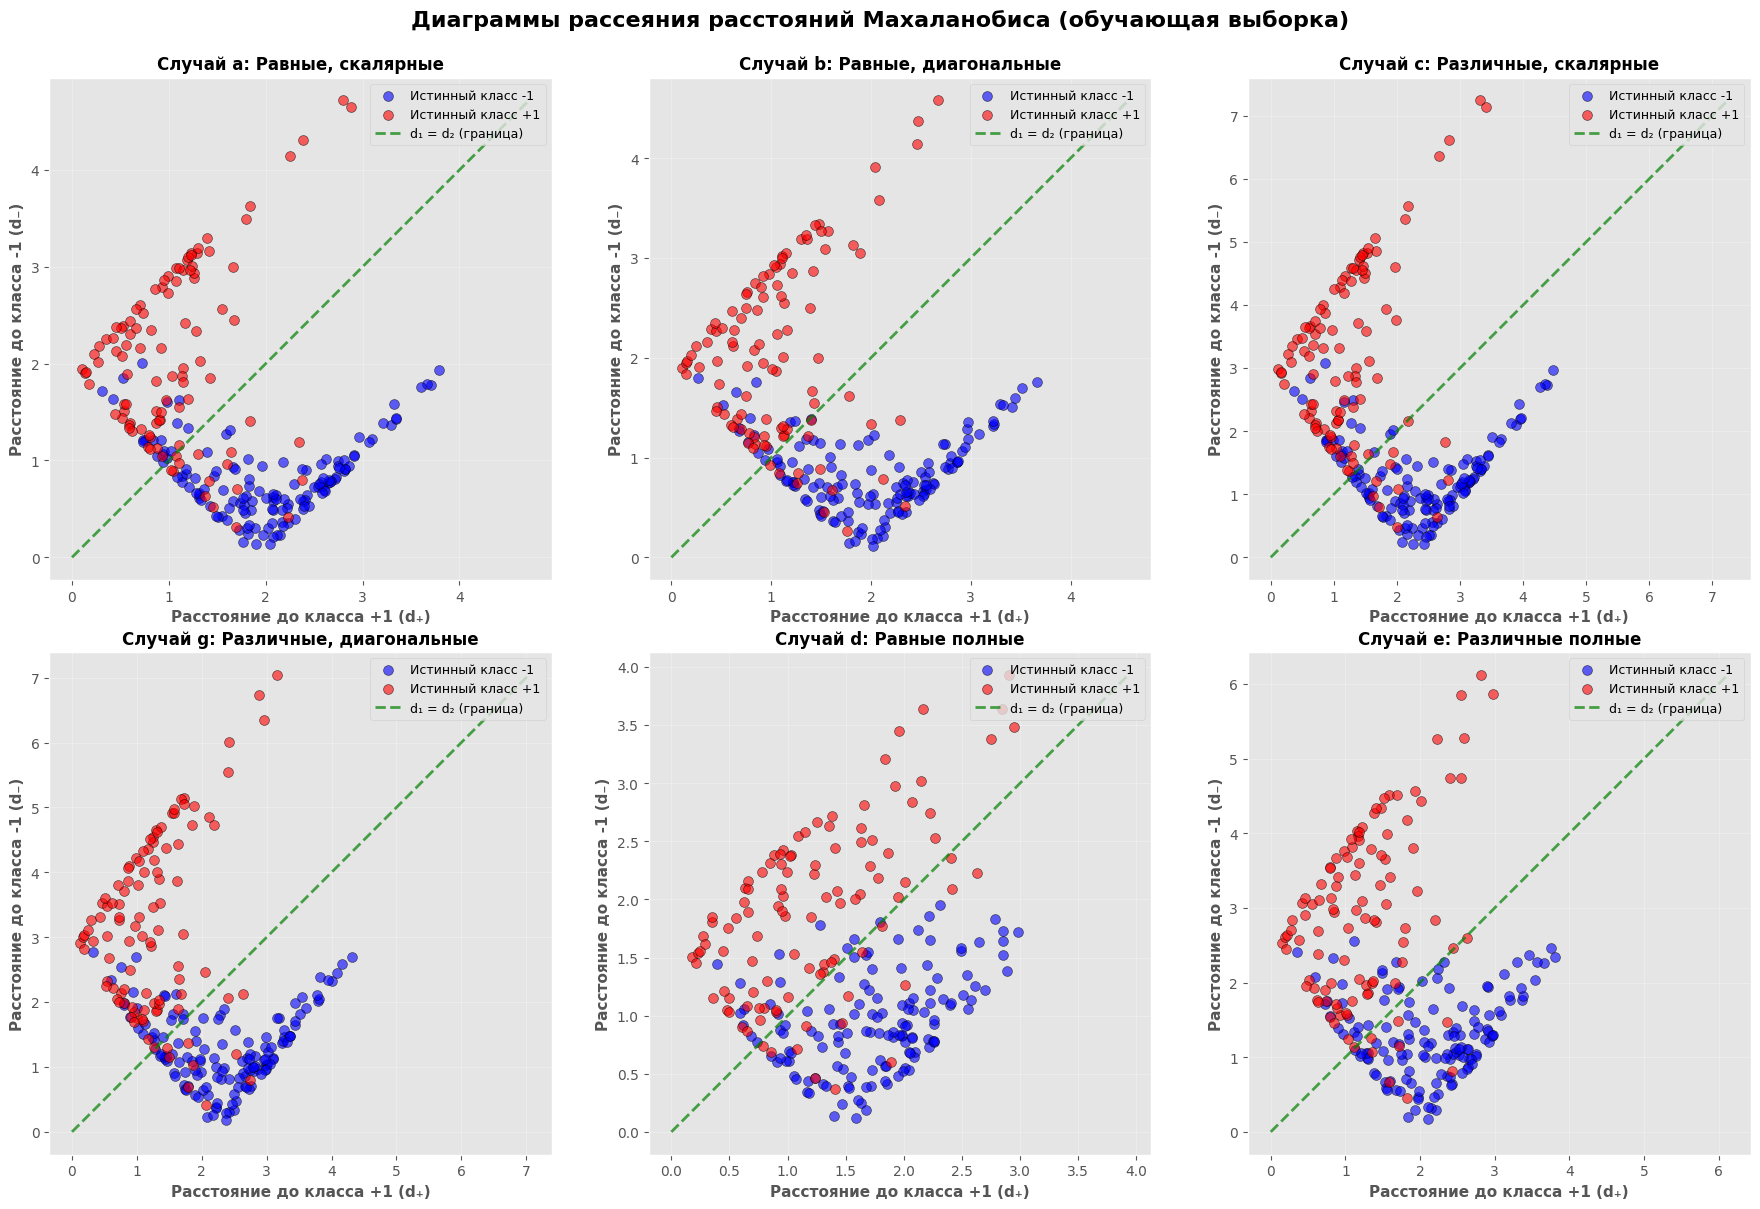

In [235]:
"""Диаграмма рассеяния расстояний"""

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(
    "Диаграммы рассеяния расстояний Махаланобиса (обучающая выборка)",
    fontsize=16,
    fontweight="bold",
    y=1.00,
)

for index, (case_name, case_data) in enumerate(CASES.items()):
    row = index // 3
    col = index % 3
    ax = axes[row, col]

    d_to_pos = case_data["train_dist_pos"]
    d_to_neg = case_data["train_dist_neg"]

    # Разделяем точки по истинным классам для цветовой кодировки
    mask_neg = y_train == -1
    mask_pos = y_train == 1

    ax.scatter(
        d_to_pos[mask_neg],
        d_to_neg[mask_neg],
        c="blue",
        alpha=0.6,
        s=50,
        label="Истинный класс -1",
        edgecolors="black",
        linewidth=0.5,
    )
    ax.scatter(
        d_to_pos[mask_pos],
        d_to_neg[mask_pos],
        c="red",
        alpha=0.6,
        s=50,
        label="Истинный класс +1",
        edgecolors="black",
        linewidth=0.5,
    )

    # Линия d₁ = d₂ (граница принятия решения)
    max_dist = max(d_to_pos.max(), d_to_neg.max())
    ax.plot(
        [0, max_dist],
        [0, max_dist],
        "g--",
        linewidth=2,
        label="d₁ = d₂ (граница)",
        alpha=0.7,
    )

    ax.set_xlabel(
        "Расстояние до класса +1 (d₊)",
        fontsize=11,
        fontweight="bold",
    )
    ax.set_ylabel(
        "Расстояние до класса -1 (d₋)",
        fontsize=11,
        fontweight="bold",
    )
    ax.set_title(
        f"Случай {case_name}: {case_data['name']}",
        fontsize=12,
        fontweight="bold",
    )
    ax.legend(loc="upper right", fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_aspect("equal", adjustable="box")

plt.tight_layout()
plt.savefig("scatter_distances.png", dpi=300, bbox_inches="tight")
plt.show()

In [236]:
"""Анализ рассеяния расстояний."""

for case_name, case_data in CASES.items():
    d_to_pos = case_data["train_dist_pos"]

    # Расст. до +1 для точек класса -1
    d_pos_from_neg_class = d_to_pos[y_train == -1]

    # Расст. до +1 для точек класса +1
    d_pos_from_pos_class = d_to_pos[y_train == 1]

    # Вычисляем средние расстояния
    mean_neg = np.mean(d_pos_from_neg_class)
    mean_pos = np.mean(d_pos_from_pos_class)

    # Стандартные отклонения
    std_neg = np.std(d_pos_from_neg_class)
    std_pos = np.std(d_pos_from_pos_class)

    # Метрика разделимости (чем больше, тем лучше разделение)
    separation = abs(mean_pos - mean_neg) / (std_pos + std_neg)

    print(f" – Случай {case_name.upper()}: {case_data['name']}")
    print(f"   Среднее расстояние до +1 для класса -1: {mean_neg:.3f} ± {std_neg:.3f}")
    print(f"   Среднее расстояние до +1 для класса +1: {mean_pos:.3f} ± {std_pos:.3f}")
    print(f"   Коэффициент разделимости: {separation:.3f}")
    print()

 – Случай A: Равные, скалярные
   Среднее расстояние до +1 для класса -1: 1.997 ± 0.738
   Среднее расстояние до +1 для класса +1: 1.052 ± 0.555
   Коэффициент разделимости: 0.731

 – Случай B: Равные, диагональные
   Среднее расстояние до +1 для класса -1: 1.997 ± 0.717
   Среднее расстояние до +1 для класса +1: 1.069 ± 0.544
   Коэффициент разделимости: 0.736

 – Случай C: Различные, скалярные
   Среднее расстояние до +1 для класса -1: 2.363 ± 0.873
   Среднее расстояние до +1 для класса +1: 1.245 ± 0.657
   Коэффициент разделимости: 0.731

 – Случай G: Различные, диагональные
   Среднее расстояние до +1 для класса -1: 2.347 ± 0.842
   Среднее расстояние до +1 для класса +1: 1.255 ± 0.638
   Коэффициент разделимости: 0.738

 – Случай D: Равные полные
   Среднее расстояние до +1 для класса -1: 1.740 ± 0.562
   Среднее расстояние до +1 для класса +1: 1.221 ± 0.653
   Коэффициент разделимости: 0.427

 – Случай E: Различные полные
   Среднее расстояние до +1 для класса -1: 2.133 ± 0.734


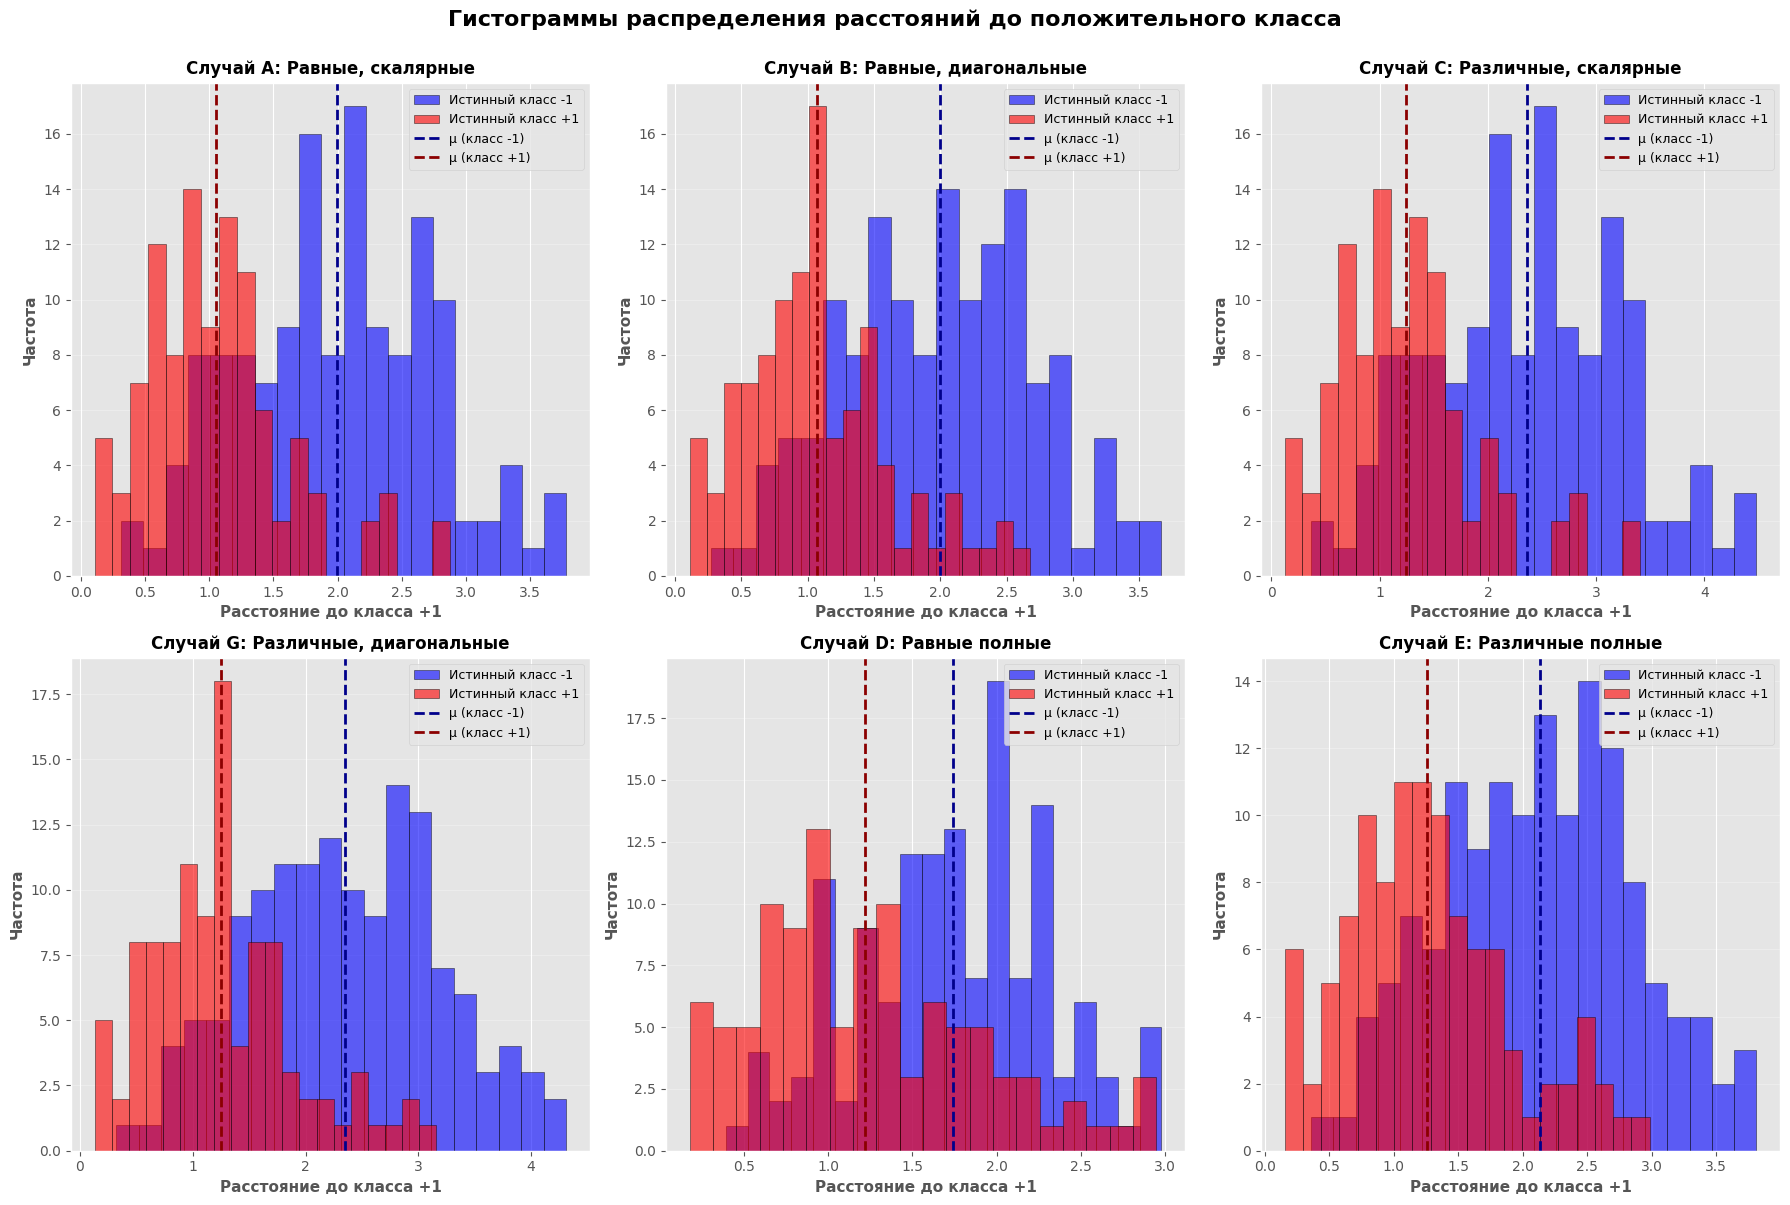

In [237]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(
    "Гистограммы распределения расстояний до положительного класса",
    fontsize=16,
    fontweight="bold",
    y=1.00,
)

for index, (case_name, case_data) in enumerate(CASES.items()):
    row = index // 3
    col = index % 3
    ax = axes[row, col]

    # Расстояния до положительного класса
    d_to_pos = case_data["train_dist_pos"]

    # Разделяем по истинным классам
    d_pos_neg_class = d_to_pos[y_train == -1]
    d_pos_pos_class = d_to_pos[y_train == 1]

    # Строим гистограммы
    ax.hist(
        d_pos_neg_class,
        bins=20,
        alpha=0.6,
        color="blue",
        label="Истинный класс -1",
        edgecolor="black",
        linewidth=0.5,
    )
    ax.hist(
        d_pos_pos_class,
        bins=20,
        alpha=0.6,
        color="red",
        label="Истинный класс +1",
        edgecolor="black",
        linewidth=0.5,
    )

    # Добавляем вертикальные линии средних значений
    ax.axvline(
        np.mean(d_pos_neg_class),
        color="darkblue",
        linestyle="--",
        linewidth=2,
        label=f"μ (класс -1)",
    )
    ax.axvline(
        np.mean(d_pos_pos_class),
        color="darkred",
        linestyle="--",
        linewidth=2,
        label=f"μ (класс +1)",
    )

    ax.set_xlabel("Расстояние до класса +1", fontsize=11, fontweight="bold")
    ax.set_ylabel("Частота", fontsize=11, fontweight="bold")
    ax.set_title(
        f"Случай {case_name.upper()}: {case_data['name']}",
        fontsize=12,
        fontweight="bold",
    )
    ax.legend(loc="upper right", fontsize=9)
    ax.grid(True, alpha=0.3, axis="y")


plt.tight_layout()
plt.savefig("histograms_distances.png", dpi=300, bbox_inches="tight")
plt.show()

In [238]:
print("=" * 140)
print(55 * "-" + " " + "Сводная таблица статистик" + " " + 55 * "-")
print("=" * 140 + "\n")

summary_data = []

for case_id, case_data in CASES.items():
    d_to_pos = case_data["train_dist_pos"]
    d_to_neg = case_data["train_dist_neg"]

    summary_data.append({
        "Случай": case_id.upper(),
        "Описание": case_data["name"],
        "Среднее d₊ (класс -1)": np.mean(d_to_pos[y_train == -1]),
        "Среднее d₊ (класс +1)": np.mean(d_to_pos[y_train == 1]),
        "Среднее d₋ (класс -1)": np.mean(d_to_neg[y_train == -1]),
        "Среднее d₋ (класс +1)": np.mean(d_to_neg[y_train == 1]),
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

------------------------------------------------------- Сводная таблица статистик -------------------------------------------------------

Случай                Описание  Среднее d₊ (класс -1)  Среднее d₊ (класс +1)  Среднее d₋ (класс -1)  Среднее d₋ (класс +1)
     A       Равные, скалярные               1.997377               1.052387               0.823861               2.069033
     B    Равные, диагональные               1.996603               1.068598               0.834278               2.076476
     C    Различные, скалярные               2.362888               1.244969               1.265266               3.177571
     G Различные, диагональные               2.346938               1.254577               1.284349               3.196197
     D           Равные полные               1.739727               1.221061               0.949040               1.904037
     E        Различные полные               2.133354               1.258054               1.295394               2.929471


In [239]:
results_train = pd.DataFrame({
    "x1": X_train[:, 0],
    "x2": X_train[:, 1],
    "true_label": y_train,
})

results_test = pd.DataFrame({
    "x1": X_test[:, 0],
    "x2": X_test[:, 1],
    "true_label": y_test,
})

for case_id, case_data in CASES.items():
    results_train[f"{case_id}_dist_to_neg"] = case_data["train_dist_neg"]
    results_train[f"{case_id}_dist_to_pos"] = case_data["train_dist_pos"]

    results_test[f"{case_id}_dist_to_neg"] = case_data["test_dist_neg"]
    results_test[f"{case_id}_dist_to_pos"] = case_data["test_dist_pos"]

results_train.to_csv("distances_train.csv", index=False)
results_test.to_csv("distances_test.csv", index=False)

<h4>2. На диаграмме рассеяния исходных данных изобразить границы классов (геометрическое место точек, равноудалённых по Махаланобису от обоих классов). 
Сравнить границы для случаев а)–е).</h4>


Граница класса (decision boundary) — это геометрическое место точек в пространстве признаков, которые равноудалены по расстоянию Махаланобиса от обоих классов.

$$d_+​(x)=d_-​(x)$$


In [240]:
"""Предобработка данных для визуализации границ классов."""

# Определяем диапазон для визуализации (с небольшим запасом)
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

print(f"Диапазон x1: [{x1_min:.2f}, {x1_max:.2f}]")
print(f"Диапазон x2: [{x2_min:.2f}, {x2_max:.2f}]")

# Создаём плотную сетку точек (mesh grid)
# Чем больше точек, тем глаже будут границы
h = 0.05  # Шаг сетки
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

print(f"\nРазмер сетки: {xx1.shape[0]} × {xx1.shape[1]} = {xx1.size} точек")
print(f"Шаг сетки: {h}")

# Преобразуем сетку в массив точек для вычислений
X_grid = np.c_[xx1.ravel(), xx2.ravel()]
print(f"Массив точек для вычислений: {X_grid.shape}")

Диапазон x1: [-1.26, 8.30]
Диапазон x2: [-3.70, 10.63]

Размер сетки: 287 × 192 = 55104 точек
Шаг сетки: 0.05
Массив точек для вычислений: (55104, 2)


In [241]:
"""Функция для вычисления классификационного очка."""


def calculate_desicion(X, mu_pos, mu_neg, Sigma_pos, Sigma_neg):
    """Вычисляет классификационное очко для каждой точки в X.

    score(x) = d_(x) - d+(x)

    - d₊(x) — расстояние Махаланобиса до положительного класса
    - d₋(x) — расстояние Махаланобиса до отрицательного класса

    Граница класса находится где score(x) = 0
    """
    distance_to_positive = mahalanobis_distance(X, mu_pos, Sigma_pos)
    distance_to_negative = mahalanobis_distance(X, mu_neg, Sigma_neg)
    return distance_to_negative - distance_to_positive

In [242]:
"""Вычисление классификационных очков для всех точек сетки."""

for case_name, case_data in CASES.items():
    Z = calculate_desicion(
        X_grid,
        mu_positive,
        mu_negative,
        case_data["Sigma_positive"],
        case_data["Sigma_negative"],
    )
    Z = Z.reshape(xx1.shape)

    case_data["Z"] = Z

    print(f"   - Вычислено {X_grid.shape[0]} классификационных очков")
    print(f"   - Min score: {Z.min():.3f}, Max score: {Z.max():.3f}\n")

   - Вычислено 55104 классификационных очков
   - Min score: -1.921, Max score: 1.921

   - Вычислено 55104 классификационных очков
   - Min score: -1.914, Max score: 1.914

   - Вычислено 55104 классификационных очков
   - Min score: -2.265, Max score: 4.360

   - Вычислено 55104 классификационных очков
   - Min score: -2.240, Max score: 4.379

   - Вычислено 55104 классификационных очков
   - Min score: -1.505, Max score: 1.505

   - Вычислено 55104 классификационных очков
   - Min score: -1.977, Max score: 3.717



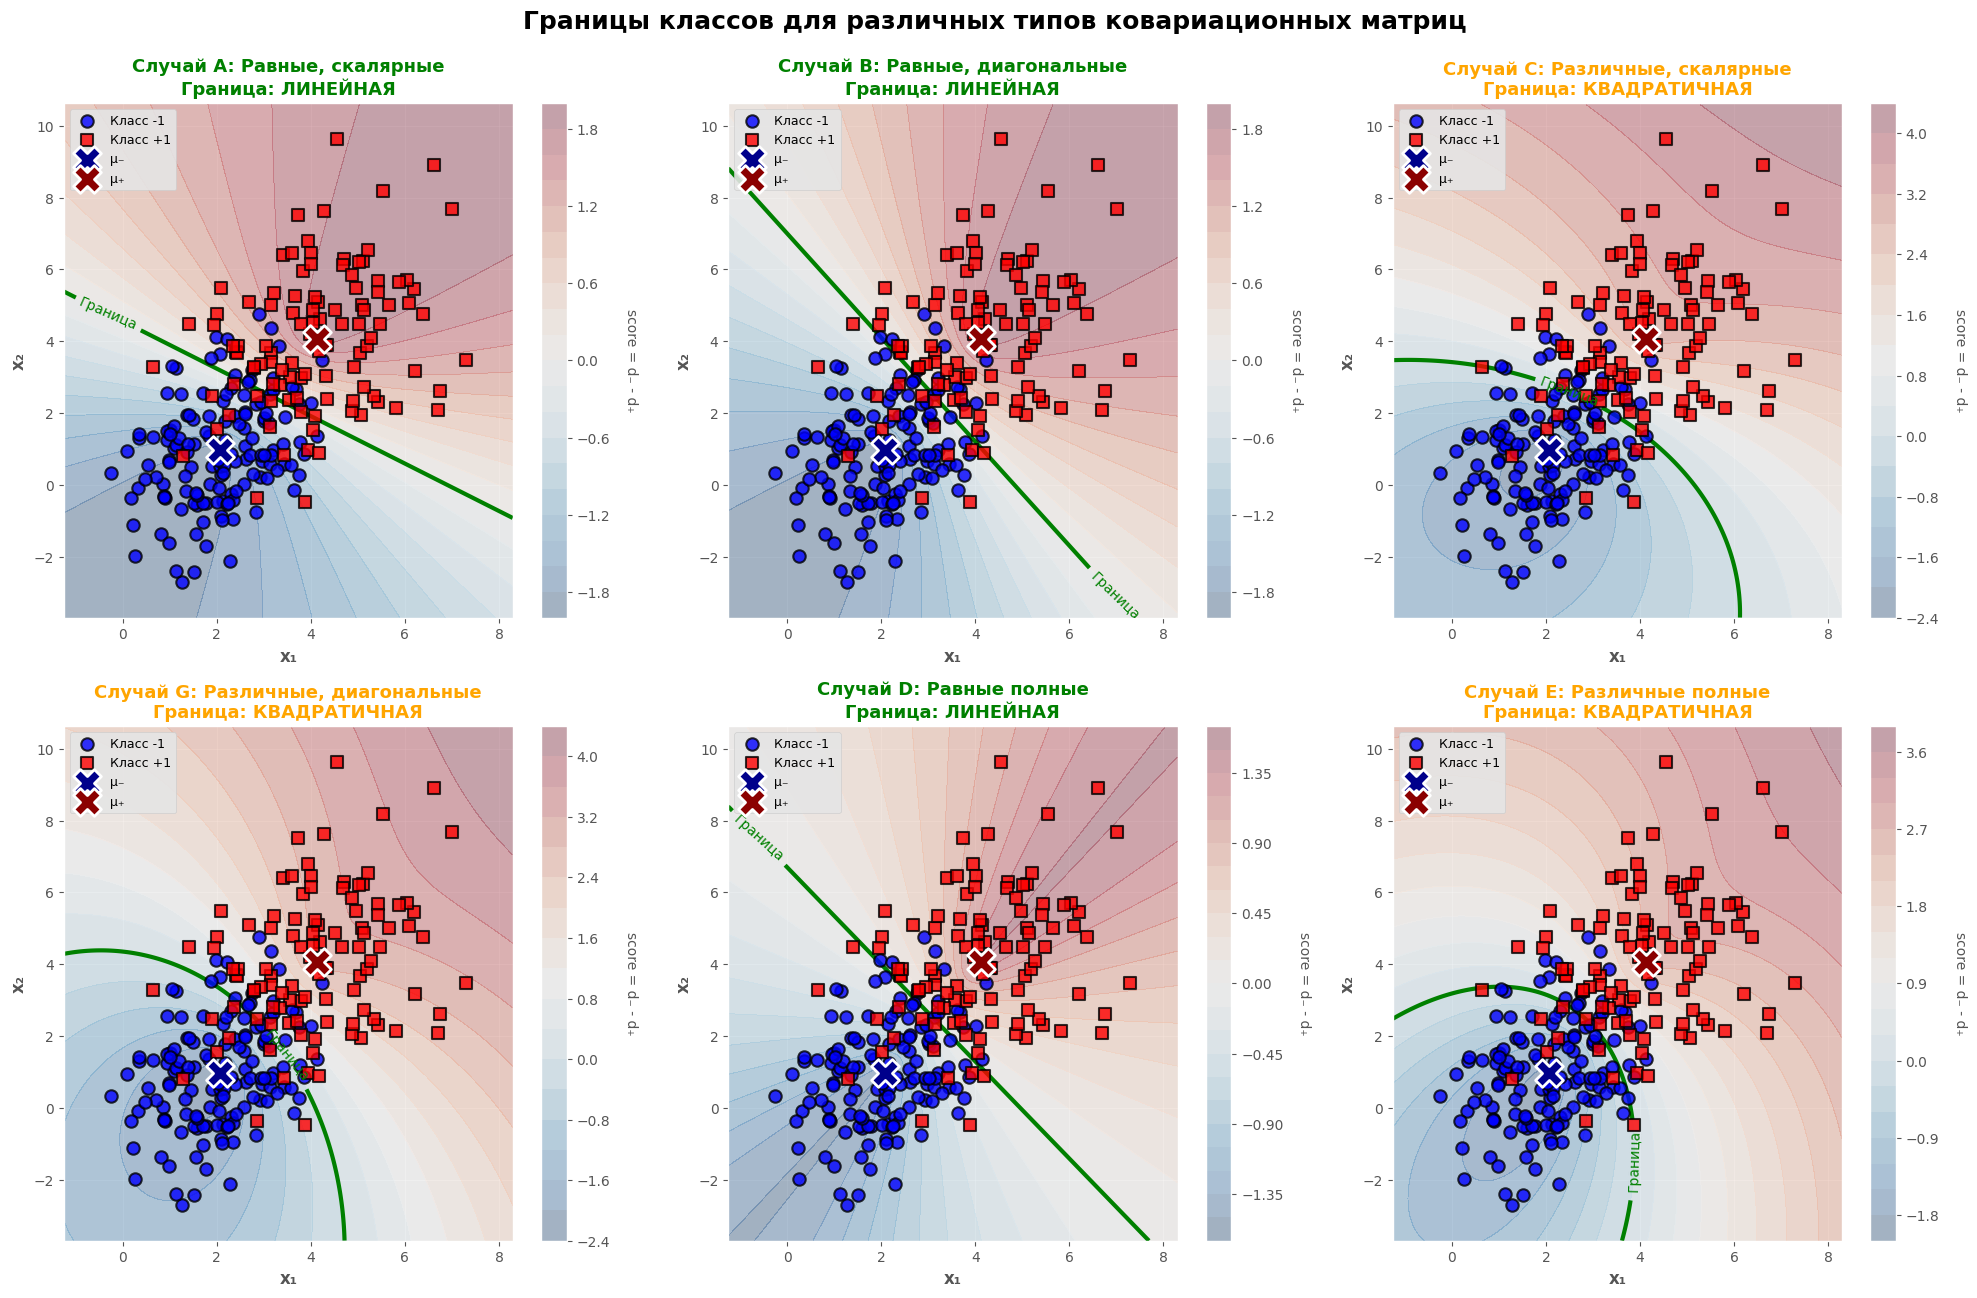

In [243]:
"""Визуализация границ классов для различных типов ковариационных матриц."""

fig, axes = plt.subplots(2, 3, figsize=(20, 13))
fig.suptitle(
    "Границы классов для различных типов ковариационных матриц",
    fontsize=18,
    fontweight="bold",
    y=0.995,
)


for index, (case_name, case_data) in enumerate(CASES.items()):
    row = index // 3
    col = index % 3
    ax = axes[row, col]

    Z = case_data["Z"]

    contourf = ax.contourf(xx1, xx2, Z, levels=20, cmap="RdBu_r", alpha=0.3)
    contour = ax.contour(
        xx1,
        xx2,
        Z,
        levels=[0],
        colors="green",
        linewidths=3,
        linestyles="solid",
    )
    ax.clabel(contour, inline=True, fontsize=10, fmt="Граница")

    # TRAIN DATA
    # Точки класса -1 (синие)
    ax.scatter(
        X_train[y_train == -1, 0],
        X_train[y_train == -1, 1],
        c="blue",
        marker="o",
        s=80,
        edgecolors="black",
        linewidth=1.5,
        alpha=0.8,
        label="Класс -1",
        zorder=3,
    )

    # Точки класса +1 (красные)
    ax.scatter(
        X_train[y_train == 1, 0],
        X_train[y_train == 1, 1],
        c="red",
        marker="s",
        s=80,
        edgecolors="black",
        linewidth=1.5,
        alpha=0.8,
        label="Класс +1",
        zorder=3,
    )

    ax.scatter(
        mu_negative[0],
        mu_negative[1],
        c="darkblue",
        marker="X",
        s=400,
        edgecolors="white",
        linewidth=2,
        label="μ₋",
        zorder=4,
    )
    ax.scatter(
        mu_positive[0],
        mu_positive[1],
        c="darkred",
        marker="X",
        s=400,
        edgecolors="white",
        linewidth=2,
        label="μ₊",
        zorder=4,
    )

    if np.allclose(case_data["Sigma_negative"], case_data["Sigma_positive"]):
        boundary_type = "ЛИНЕЙНАЯ"
        color_type = "green"
    else:
        boundary_type = "КВАДРАТИЧНАЯ"
        color_type = "orange"

    title = f"Случай {case_name.upper()}: {case_data['name']}\n"
    title += f"Граница: {boundary_type}"
    ax.set_title(title, fontsize=13, fontweight="bold", color=color_type)

    ax.set_xlabel("x₁", fontsize=12, fontweight="bold")
    ax.set_ylabel("x₂", fontsize=12, fontweight="bold")
    ax.legend(loc="upper left", fontsize=9, framealpha=0.9)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(x1_min, x1_max)
    ax.set_ylim(x2_min, x2_max)

    cbar = plt.colorbar(contourf, ax=ax)
    cbar.set_label("score = d₋ - d₊", rotation=270, labelpad=20, fontsize=10)

plt.tight_layout()
plt.savefig("decision_boundaries.png", dpi=300, bbox_inches="tight")
plt.show()


In [244]:
"""Визуализация границ классов отдельно для каждого случая."""

for case_id, case_data in CASES.items():
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))

    Z = case_data["Z"]

    contourf = ax.contourf(xx1, xx2, Z, levels=50, cmap="RdBu_r", alpha=0.4)

    contour = ax.contour(
        xx1, xx2, Z, levels=[0], colors="green", linewidths=4, linestyles="solid"
    )
    ax.clabel(contour, inline=True, fontsize=12, fmt="ГРАНИЦА")

    contour_lines = ax.contour(
        xx1,
        xx2,
        Z,
        levels=10,
        colors="gray",
        linewidths=0.5,
        alpha=0.5,
        linestyles="dashed",
    )
    ax.clabel(contour_lines, inline=True, fontsize=8)

    ax.scatter(
        X_train[y_train == -1, 0],
        X_train[y_train == -1, 1],
        c="blue",
        marker="o",
        s=120,
        edgecolors="black",
        linewidth=2,
        alpha=0.9,
        label="Класс -1",
        zorder=3,
    )
    ax.scatter(
        X_train[y_train == 1, 0],
        X_train[y_train == 1, 1],
        c="red",
        marker="s",
        s=120,
        edgecolors="black",
        linewidth=2,
        alpha=0.9,
        label="Класс +1",
        zorder=3,
    )

    ax.scatter(
        mu_negative[0],
        mu_negative[1],
        c="darkblue",
        marker="X",
        s=600,
        edgecolors="white",
        linewidth=3,
        label="Центр класса -1 (μ₋)",
        zorder=4,
    )
    ax.scatter(
        mu_positive[0],
        mu_positive[1],
        c="darkred",
        marker="X",
        s=600,
        edgecolors="white",
        linewidth=3,
        label="Центр класса +1 (μ₊)",
        zorder=4,
    )

    # Определяем тип границы
    if np.allclose(case_data["Sigma_negative"], case_data["Sigma_positive"]):
        boundary_type = "ЛИНЕЙНАЯ ГРАНИЦА (Σ₁ = Σ₂)"
        subtitle = "Аналог Linear Discriminant Analysis (LDA)"
    else:
        boundary_type = "КВАДРАТИЧНАЯ ГРАНИЦА (Σ₁ ≠ Σ₂)"
        subtitle = "Аналог Quadratic Discriminant Analysis (QDA)"

    title = f"Случай {case_id.upper()}: {case_data['name']}\n"
    title += f"{boundary_type}\n{subtitle}"
    ax.set_title(title, fontsize=16, fontweight="bold", pad=20)

    ax.set_xlabel("Признак x₁", fontsize=14, fontweight="bold")
    ax.set_ylabel("Признак x₂", fontsize=14, fontweight="bold")
    ax.legend(loc="best", fontsize=12, framealpha=0.95)
    ax.grid(True, alpha=0.3, linestyle="--")

    # Цветовая шкала
    cbar = plt.colorbar(contourf, ax=ax)
    cbar.set_label(
        "Классификационное очко\nscore = d₋(x) - d₊(x)",
        rotation=270,
        labelpad=30,
        fontsize=12,
        fontweight="bold",
    )
    cbar.ax.tick_params(labelsize=10)

    plt.tight_layout()
    plt.savefig(f"boundary_case_{case_id}_detailed.png", dpi=300, bbox_inches="tight")
    plt.close()

In [245]:
"""Анализ и сравнение границ классов для различных типов ковариационных матриц."""


for case_id, case_data in CASES.items():
    is_equal_cov = np.allclose(case_data["Sigma_negative"], case_data["Sigma_positive"])
    boundary_type = "Линейная" if is_equal_cov else "Квадратичная"

    # Анализируем сложность границы (насколько она искривлена)
    Z = case_data["Z"]

    # Вычисляем градиент - насколько быстро меняется score
    grad_x = np.gradient(Z, axis=1)
    grad_y = np.gradient(Z, axis=0)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    complexity = np.std(gradient_magnitude)

    # Подсчёт ошибок на обучающей выборке
    predictions_train = case_data["train_dist_pos"] < case_data["train_dist_neg"]
    predictions_train = np.where(predictions_train, 1, -1)
    errors_train = np.sum(predictions_train != y_train)
    accuracy_train = 100 * (1 - errors_train / len(y_train))

    print(f"{'─' * 80}")
    print(f"Случай {case_id.upper()}: {case_data['name']}")
    print(f"{'─' * 80}")
    print(f"  Тип границы:        {boundary_type}")
    print(f"  Сложность:          {complexity:.4f} (чем больше, тем сложнее)")
    print(f"  Ошибок на train:    {errors_train} из {len(y_train)}")
    print(f"  Точность на train:  {accuracy_train:.2f}%")
    print()

────────────────────────────────────────────────────────────────────────────────
Случай A: Равные, скалярные
────────────────────────────────────────────────────────────────────────────────
  Тип границы:        Линейная
  Сложность:          0.0120 (чем больше, тем сложнее)
  Ошибок на train:    35 из 245
  Точность на train:  85.71%

────────────────────────────────────────────────────────────────────────────────
Случай B: Равные, диагональные
────────────────────────────────────────────────────────────────────────────────
  Тип границы:        Линейная
  Сложность:          0.0125 (чем больше, тем сложнее)
  Ошибок на train:    29 из 245
  Точность на train:  88.16%

────────────────────────────────────────────────────────────────────────────────
Случай C: Различные, скалярные
────────────────────────────────────────────────────────────────────────────────
  Тип границы:        Квадратичная
  Сложность:          0.0146 (чем больше, тем сложнее)
  Ошибок на train:    34 из 245
  Точн

1. <b>ЛИНЕЙНЫЕ ГРАНИЦЫ (случаи a, b, d):</b>

- Простые и интерпретируемые
- Устойчивы к переобучению
- Могут быть недостаточно гибкими для сложных данных

2. <b>КВАДРАТИЧНЫЕ ГРАНИЦЫ (случаи e, g, c):</b>

- Более гибкие и адаптивные
- Могут лучше подстраиваться под форму данных
- Риск переобучения при малом объёме данных


In [246]:
COLORS = {
    "a": "blue",
    "b": "black",
    "c": "green",
    "g": "orange",
    "d": "purple",
    "e": "red",
}

LINE_STYLES = {
    "a": "solid",
    "b": "dashed",
    "c": "solid",
    "g": "dashed",
    "d": "dotted",
    "e": "solid",
}

/var/folders/j9/rs4bzxrn6dd80y7z_988y_000000gn/T/ipykernel_63553/512242381.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  ax1.contour(
/var/folders/j9/rs4bzxrn6dd80y7z_988y_000000gn/T/ipykernel_63553/512242381.py:19: UserWarning: The following kwargs were not used by contour: 'label'
  ax1.contour(


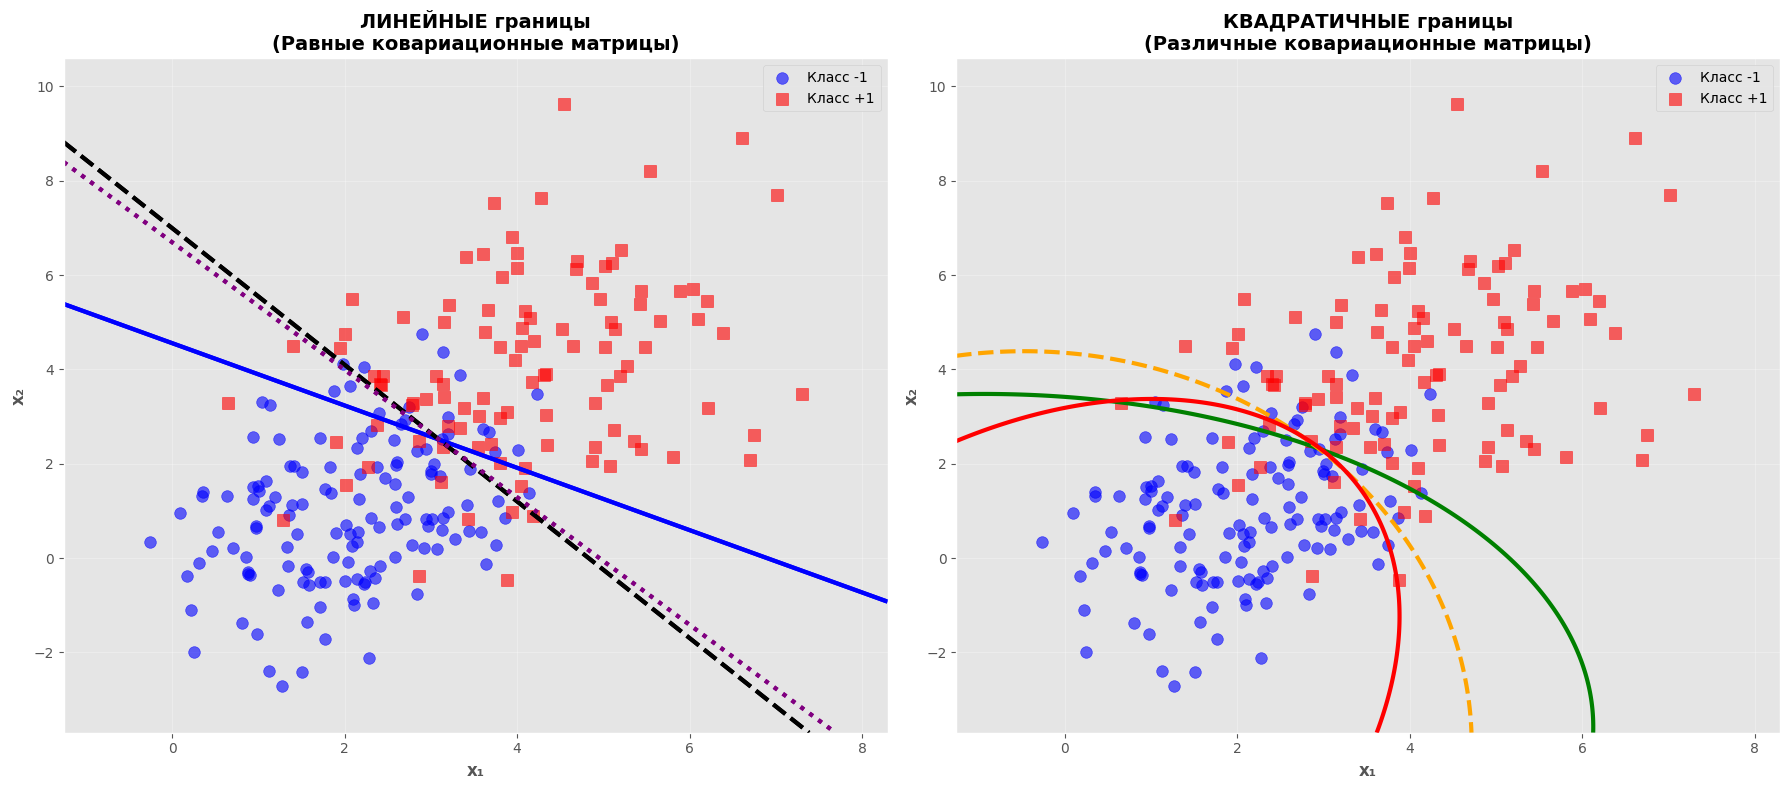

In [247]:
"""Сравнение линейных и квадратичных границ классов."""

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

linear_cases = ("a", "b", "d")
for case_id in linear_cases:
    case_data = CASES[case_id]
    Z = case_data["Z"]
    ax1.contour(
        xx1,
        xx2,
        Z,
        levels=[0],
        colors=COLORS[case_id],
        linewidths=3,
        linestyles=LINE_STYLES[case_id],
        label=f"{case_id.upper()}: {case_data['name']}",
    )
    ax1.contour(
        xx1,
        xx2,
        Z,
        levels=[0],
        colors=COLORS[case_id],
        linewidths=3,
        linestyles=LINE_STYLES[case_id],
        label=f"{case_id.upper()}: {case_data['name']}",
    )

ax1.scatter(
    X_train[y_train == -1, 0],
    X_train[y_train == -1, 1],
    c="blue",
    marker="o",
    s=70,
    alpha=0.6,
    label="Класс -1",
)
ax1.scatter(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    c="red",
    marker="s",
    s=70,
    alpha=0.6,
    label="Класс +1",
)

ax1.set_title(
    "ЛИНЕЙНЫЕ границы\n(Равные ковариационные матрицы)", fontsize=14, fontweight="bold"
)
ax1.set_xlabel("x₁", fontsize=12, fontweight="bold")
ax1.set_ylabel("x₂", fontsize=12, fontweight="bold")
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)


quadratic_cases = ("c", "g", "e")
for case_id in quadratic_cases:
    case_data = CASES[case_id]
    Z = case_data["Z"]
    ax2.contour(
        xx1,
        xx2,
        Z,
        levels=[0],
        colors=COLORS[case_id],
        linewidths=3,
        linestyles=LINE_STYLES[case_id],
    )

ax2.scatter(
    X_train[y_train == -1, 0],
    X_train[y_train == -1, 1],
    c="blue",
    marker="o",
    s=70,
    alpha=0.6,
    label="Класс -1",
)
ax2.scatter(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    c="red",
    marker="s",
    s=70,
    alpha=0.6,
    label="Класс +1",
)

ax2.set_title(
    "КВАДРАТИЧНЫЕ границы\n(Различные ковариационные матрицы)",
    fontsize=14,
    fontweight="bold",
)
ax2.set_xlabel("x₁", fontsize=12, fontweight="bold")
ax2.set_ylabel("x₂", fontsize=12, fontweight="bold")
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("boundaries_linear_vs_quadratic.png", dpi=300, bbox_inches="tight")
plt.show()

<h4>3. Рассчитать показатели точности на обучающей и тестовой выборках для построенных классификаторов.<h4>

- <code>error rate</code>
- <code>accuracy</code>
- <code>sensitivity</code>
- <code>specificity</code>
- <code>precision</code>
- <code>fall-out</code>
- <code>F1-score</code>
- <code>Cohen’s kappa</code>


<h4>Матрица ошибок</h4>

<img src="https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2025/05/confusion_matrix-1.png?fit=550%2C450&ssl=1"></img>


1. **TP (True Positive) = Истинно положительные:**

- Класс +1 правильно предсказан как +1: Правильно определили положительный класс

2. **TN (True Negative) = Истинно отрицательные:**

- Класс -1 правильно предсказан как -1: Правильно определили отрицательный класс

3. **FP (False Positive) = Ложноположительные (Ошибка I рода)**

- Класс -1 ошибочно предсказан как +1: "Ложная тревога" — сказали "+1", а на самом деле "-1"

4. FN (False Negative) = Ложноотрицательные (Ошибка II рода)

- Класс +1 ошибочно предсказан как -1: "Пропуск" — сказали "-1", а на самом деле "+1"


**1️⃣ Accuracy (Точность)** Доля всех правильных предсказаний среди всех предсказаний.

$$Accuracy=\frac{TP+TN} {FP+FN+TP+TN​}\$$

2️⃣ Error Rate (Доля ошибок) Доля неправильных предсказаний.

$$Error  rate=\frac{FP + FN} {FP+FN+TP+TN​}\$$

3️⃣ Sensitivity / Recall / TPR (Чувствительность) Из всех истинных положительных, сколько мы нашли?

$$Sensitivity=Recall=TPR=\frac{TP} {FN+TP​}\$$

4️⃣ Specificity / TNR (Специфичность) Из всех истинных отрицательных, сколько мы правильно определили?

$$Specificity=TNR=\frac{TN} {TN+FP​}\$$

5️⃣ Precision / PPV (Точность положительных) Из всех предсказанных положительных, сколько действительно положительные?

$$Precision=PPV=\frac{TP} {TP+FP​}\$$

6️⃣ Fall-out / FPR (Доля ложноположительных) Из всех истинных отрицательных, сколько мы ошибочно назвали положительными?

$$Fallout=FPR=\frac{FP} {TN+FP​}\ = 1 - Specificity$$

7️⃣ F1-Score (Гармоническое среднее) Баланс между Precision и Recall.

$$F_1=2*\frac{Precision * Recall} {Precision + Recall​}\$$

8️⃣ Cohen's Kappa (Каппа Коэна) Насколько классификатор лучше случайного угадывания, с учётом распределения классов.

$$κ=\frac{p_0 - p_e} {1 - p_e}\$$

- $p_0$​ - наблюдаемая согласованность (Accuracy)
- $p_e$ - ожидаемая случайная согласованность

$$p_e=\frac{(TP+FP)(TP+FN)+(TN+FN)(TN+FP)​} {(TP+TP+FP+FN)^2​}\$$

Диапазон: [-1, 1]

- $κ$ = 1 — идеальное согласие
- $κ$ = 0 — согласие на уровне случайности
- $κ$ < 0 — хуже случайного (маловероятно)


In [248]:
"""Функция для расчета всех метрик."""


def calculate_metrics(y_true, y_pred) -> dict:
    """Расчет всех метрик классификации.

    y_true: np.ndarray - истинные классы
    y_pred: np.ndarray - предсказанные классы
    verbose: bool - флаг для печати confusion matrix

    Возвращает словарь с метриками:
    - error_rate
    - accuracy
    - sensitivity
    - specificity
    - precision
    - fall-out
    - f1_score
    - cohen_kappa
    """

    cm = confusion_matrix(y_true, y_pred, labels=[-1, 1])
    TN, FP = cm[0, 0], cm[0, 1]
    FN, TP = cm[1, 0], cm[1, 1]

    print("Confusion Matrix:")
    print("                 Predicted")
    print("              -1        +1")
    print(f"Actual  -1  [{TN:4d}]    [{FP:4d}]  (TN, FP)")
    print(f"        +1  [{FN:4d}]    [{TP:4d}]  (FN, TP)")
    print()

    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    sensitivity = recall_score(y_true, y_pred, pos_label=1, zero_division=0)
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    precision = precision_score(y_true, y_pred, pos_label=1, zero_division=0)
    fall_out = FP / (FP + TN) if (FP + TN) > 0 else 0
    f1 = f1_score(y_true, y_pred, pos_label=1, zero_division=0)
    kappa = cohen_kappa_score(y_true, y_pred)

    return {
        "TP": TP,
        "TN": TN,
        "FP": FP,
        "FN": FN,
        "accuracy": accuracy,
        "error_rate": error_rate,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "precision": precision,
        "fall_out": fall_out,
        "f1_score": f1,
        "cohen_kappa": kappa,
    }


def print_metrics(metrics, dataset_name=""):
    print(f"\n{'─' * 80}")
    if dataset_name:
        print(f" Метрики для {dataset_name}")
    print(f"{'─' * 80}")

    print("\n🔢 Confusion Matrix:")
    print(f"   TP (True Positive):  {metrics['TP']:4d}")
    print(f"   TN (True Negative):  {metrics['TN']:4d}")
    print(f"   FP (False Positive): {metrics['FP']:4d}")
    print(f"   FN (False Negative): {metrics['FN']:4d}")

    print("\n Метрики качества:")
    print(
        f"   1. Error Rate:    {metrics['error_rate']:.4f} ({metrics['error_rate'] * 100:.2f}%)"
    )
    print(
        f"   2. Accuracy:      {metrics['accuracy']:.4f} ({metrics['accuracy'] * 100:.2f}%)"
    )
    print(
        f"   3. Sensitivity:   {metrics['sensitivity']:.4f} ({metrics['sensitivity'] * 100:.2f}%)"
    )
    print(
        f"   4. Specificity:   {metrics['specificity']:.4f} ({metrics['specificity'] * 100:.2f}%)"
    )
    print(
        f"   5. Precision:     {metrics['precision']:.4f} ({metrics['precision'] * 100:.2f}%)"
    )
    print(
        f"   6. Fall-out:      {metrics['fall_out']:.4f} ({metrics['fall_out'] * 100:.2f}%)"
    )
    print(f"   7. F1-Score:      {metrics['f1_score']:.4f}")
    print(f"   8. Cohen's Kappa: {metrics['cohen_kappa']:.4f}")

In [249]:
print("- Создание предсказаний для всех случаев")


print("Правило классификации:")
print("   Если d₊(x) < d₋(x)  →  класс = +1")
print("   Если d₊(x) > d₋(x)  →  класс = -1")
print("   (Выбираем класс с МЕНЬШИМ расстоянием Махаланобиса)\n")

for case_id, case_data in CASES.items():
    print(f"- Случай {case_id.upper()}: {case_data['name']}")

    # ПРЕДСКАЗАНИЯ НА ОБУЧАЮЩЕЙ ВЫБОРКЕ
    # Сравниваем расстояния: если d₊ < d₋, то класс +1, иначе -1
    predictions_train = case_data["train_dist_pos"] < case_data["train_dist_neg"]
    predictions_train = np.where(predictions_train, 1, -1)
    case_data["predictions_train"] = predictions_train

    # ПРЕДСКАЗАНИЯ НА ТЕСТОВОЙ ВЫБОРКЕ
    predictions_test = case_data["test_dist_pos"] < case_data["test_dist_neg"]
    predictions_test = np.where(predictions_test, 1, -1)
    case_data["predictions_test"] = predictions_test

    correct_train = np.sum(predictions_train == y_train)
    correct_test = np.sum(predictions_test == y_test)

    print(
        f"   Train: {correct_train}/{len(y_train)} правильных ({100 * correct_train / len(y_train):.2f}%)"
    )
    print(
        f"   Test:  {correct_test}/{len(y_test)} правильных ({100 * correct_test / len(y_test):.2f}%)\n"
    )


- Создание предсказаний для всех случаев
Правило классификации:
   Если d₊(x) < d₋(x)  →  класс = +1
   Если d₊(x) > d₋(x)  →  класс = -1
   (Выбираем класс с МЕНЬШИМ расстоянием Махаланобиса)

- Случай A: Равные, скалярные
   Train: 210/245 правильных (85.71%)
   Test:  98/105 правильных (93.33%)

- Случай B: Равные, диагональные
   Train: 216/245 правильных (88.16%)
   Test:  101/105 правильных (96.19%)

- Случай C: Различные, скалярные
   Train: 211/245 правильных (86.12%)
   Test:  100/105 правильных (95.24%)

- Случай G: Различные, диагональные
   Train: 212/245 правильных (86.53%)
   Test:  101/105 правильных (96.19%)

- Случай D: Равные полные
   Train: 215/245 правильных (87.76%)
   Test:  101/105 правильных (96.19%)

- Случай E: Различные полные
   Train: 213/245 правильных (86.94%)
   Test:  100/105 правильных (95.24%)



In [250]:
all_metrics = {}

for case_id, case_data in CASES.items():
    print(f"\n{'=' * 80}")
    print(f"СЛУЧАЙ {case_id.upper()}: {case_data['name']}")
    print(f"{'=' * 80}")

    # === МЕТРИКИ НА ОБУЧАЮЩЕЙ ВЫБОРКЕ ===
    print("\n🎓 ОБУЧАЮЩАЯ ВЫБОРКА (Train)")
    metrics_train = calculate_metrics(y_train, case_data["predictions_train"])
    print_metrics(metrics_train, "обучающей выборки")

    # === МЕТРИКИ НА ТЕСТОВОЙ ВЫБОРКЕ ===
    print("\n\n🧪 ТЕСТОВАЯ ВЫБОРКА (Test)")
    metrics_test = calculate_metrics(y_test, case_data["predictions_test"])
    print_metrics(metrics_test, "тестовой выборки")

    print("🔍 АНАЛИЗ ПЕРЕОБУЧЕНИЯ:")
    diff_accuracy = metrics_train["accuracy"] - metrics_test["accuracy"]
    diff_f1 = metrics_train["f1_score"] - metrics_test["f1_score"]

    print(
        f"   Разница Accuracy (Train - Test): {diff_accuracy:.4f} ({diff_accuracy * 100:.2f}%)"
    )
    print(f"   Разница F1-Score (Train - Test): {diff_f1:.4f}")

    if diff_accuracy > 0.15:
        print("    СИЛЬНОЕ ПЕРЕОБУЧЕНИЕ! (разница > 15%)")
    elif diff_accuracy > 0.10:
        print("    Умеренное переобучение (разница 10-15%)")
    elif diff_accuracy > 0.05:
        print("   Небольшое переобучение (разница 5-10%) — допустимо")
    else:
        print("   Переобучения НЕТ! (разница < 5%)")

    # Сохраняем метрики
    all_metrics[case_id] = {"train": metrics_train, "test": metrics_test}


СЛУЧАЙ A: Равные, скалярные

🎓 ОБУЧАЮЩАЯ ВЫБОРКА (Train)
Confusion Matrix:
                 Predicted
              -1        +1
Actual  -1  [ 121]    [  19]  (TN, FP)
        +1  [  16]    [  89]  (FN, TP)


────────────────────────────────────────────────────────────────────────────────
 Метрики для обучающей выборки
────────────────────────────────────────────────────────────────────────────────

🔢 Confusion Matrix:
   TP (True Positive):    89
   TN (True Negative):   121
   FP (False Positive):   19
   FN (False Negative):   16

 Метрики качества:
   1. Error Rate:    0.1429 (14.29%)
   2. Accuracy:      0.8571 (85.71%)
   3. Sensitivity:   0.8476 (84.76%)
   4. Specificity:   0.8643 (86.43%)
   5. Precision:     0.8241 (82.41%)
   6. Fall-out:      0.1357 (13.57%)
   7. F1-Score:      0.8357
   8. Cohen's Kappa: 0.7094


🧪 ТЕСТОВАЯ ВЫБОРКА (Test)
Confusion Matrix:
                 Predicted
              -1        +1
Actual  -1  [  58]    [   2]  (TN, FP)
        +1  [   5]    [

In [251]:
"""Сохранение метрик в файл"""


def save_metrics_to_file(all_metrics, case: Literal["train", "test"]):
    """Сохранение метрик в файл"""

    data = []

    for case_id, case_data_dict in all_metrics.items():
        metrics = case_data_dict[case]
        data.append({
            "case_id": case_id,
            "name": CASES[case_id]["name"],
            "accuracy": metrics["accuracy"],
            "f1_score": metrics["f1_score"],
            "error_rate": metrics["error_rate"],
            "sensitivity": metrics["sensitivity"],
            "specificity": metrics["specificity"],
            "precision": metrics["precision"],
            "fall_out": metrics["fall_out"],
            "cohen_kappa": metrics["cohen_kappa"],
        })

    df = pd.DataFrame(data)
    df.to_csv(f"{case}_metrics.csv", index=False)

    return df


df_test = save_metrics_to_file(all_metrics, "test")
df_train = save_metrics_to_file(all_metrics, "train")

In [252]:
"""Сравнение и выбор лучшего классификатора"""

best_by_accuracy_train = max(
    all_metrics.items(), key=lambda x: x[1]["train"]["accuracy"]
)
best_by_accuracy_test = max(all_metrics.items(), key=lambda x: x[1]["test"]["accuracy"])
best_by_f1_train = max(all_metrics.items(), key=lambda x: x[1]["train"]["f1_score"])
best_by_f1_test = max(all_metrics.items(), key=lambda x: x[1]["test"]["f1_score"])

print("ЛУЧШИЕ КЛАССИФИКАТОРЫ ПО ACCURACY:")
print(
    f"   Train: Случай {best_by_accuracy_train[0].upper()} - "
    f"{CASES[best_by_accuracy_train[0]]['name']} "
    f"({best_by_accuracy_train[1]['train']['accuracy'] * 100:.2f}%)"
)
print(
    f"   Test:  Случай {best_by_accuracy_test[0].upper()} - "
    f"{CASES[best_by_accuracy_test[0]]['name']} "
    f"({best_by_accuracy_test[1]['test']['accuracy'] * 100:.2f}%)"
)

print("\n ЛУЧШИЕ КЛАССИФИКАТОРЫ ПО F1-SCORE:")
print(
    f"   Train: Случай {best_by_f1_train[0].upper()} - "
    f"{CASES[best_by_f1_train[0]]['name']} "
    f"({best_by_f1_train[1]['train']['f1_score']:.4f})"
)
print(
    f"   Test:  Случай {best_by_f1_test[0].upper()} - "
    f"{CASES[best_by_f1_test[0]]['name']} "
    f"({best_by_f1_test[1]['test']['f1_score']:.4f})"
)

ЛУЧШИЕ КЛАССИФИКАТОРЫ ПО ACCURACY:
   Train: Случай B - Равные, диагональные (88.16%)
   Test:  Случай B - Равные, диагональные (96.19%)

 ЛУЧШИЕ КЛАССИФИКАТОРЫ ПО F1-SCORE:
   Train: Случай B - Равные, диагональные (0.8612)
   Test:  Случай G - Различные, диагональные (0.9574)


In [253]:
good_models = {k: v for k, v in all_metrics.items() if v["test"]["accuracy"] > 0.8}

if good_models:
    # Среди хороших выбираем с наименьшим переобучением
    best_overall = min(
        good_models.items(),
        key=lambda x: abs(x[1]["train"]["accuracy"] - x[1]["test"]["accuracy"]),
    )

    bo_id = best_overall[0]
    bo_metrics_train = best_overall[1]["train"]
    bo_metrics_test = best_overall[1]["test"]

    print(f"   Случай {bo_id.upper()}: {CASES[bo_id]['name']}")
    print(f"   Accuracy Train: {bo_metrics_train['accuracy'] * 100:.2f}%")
    print(f"   Accuracy Test:  {bo_metrics_test['accuracy'] * 100:.2f}%")
    print(
        f"   Разница: {abs(bo_metrics_train['accuracy'] - bo_metrics_test['accuracy']) * 100:.2f}%"
    )
    print(f"   F1-Score Test: {bo_metrics_test['f1_score']:.4f}")
    print(
        f"\n   Эта модель показывает хороший баланс между точностью и обобщающей способностью!"
    )
else:
    print("   Нет моделей с Accuracy > 80% на тестовой выборке")

   Случай A: Равные, скалярные
   Accuracy Train: 85.71%
   Accuracy Test:  93.33%
   Разница: 7.62%
   F1-Score Test: 0.9195

   Эта модель показывает хороший баланс между точностью и обобщающей способностью!


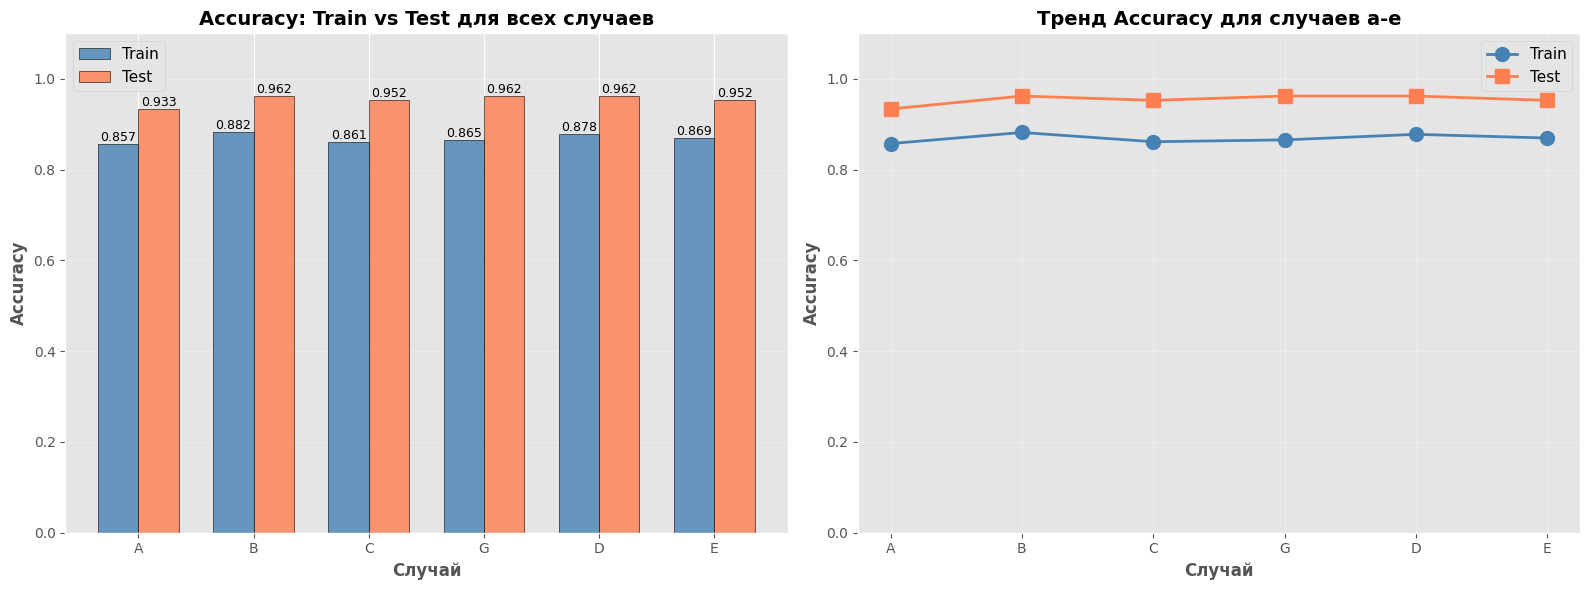

In [254]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

cases_list = list(CASES.keys())
case_names = [c.upper() for c in cases_list]

# Данные для графиков
acc_train = [all_metrics[c]["train"]["accuracy"] for c in cases_list]
acc_test = [all_metrics[c]["test"]["accuracy"] for c in cases_list]

x = np.arange(len(case_names))
width = 0.35

# График 1: Train vs Test Accuracy (столбчатая диаграмма)
bars1 = ax1.bar(
    x - width / 2,
    acc_train,
    width,
    label="Train",
    color="steelblue",
    alpha=0.8,
    edgecolor="black",
)
bars2 = ax1.bar(
    x + width / 2,
    acc_test,
    width,
    label="Test",
    color="coral",
    alpha=0.8,
    edgecolor="black",
)

ax1.set_xlabel("Случай", fontsize=12, fontweight="bold")
ax1.set_ylabel("Accuracy", fontsize=12, fontweight="bold")
ax1.set_title(
    "Accuracy: Train vs Test для всех случаев", fontsize=14, fontweight="bold"
)
ax1.set_xticks(x)
ax1.set_xticklabels(case_names)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, axis="y")
ax1.set_ylim([0, 1.1])

for bar in bars1:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{height:.3f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )
for bar in bars2:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{height:.3f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )


ax2.plot(
    case_names,
    acc_train,
    marker="o",
    linewidth=2,
    markersize=10,
    label="Train",
    color="steelblue",
)
ax2.plot(
    case_names,
    acc_test,
    marker="s",
    linewidth=2,
    markersize=10,
    label="Test",
    color="coral",
)

ax2.set_xlabel("Случай", fontsize=12, fontweight="bold")
ax2.set_ylabel("Accuracy", fontsize=12, fontweight="bold")
ax2.set_title("Тренд Accuracy для случаев а-е", fontsize=14, fontweight="bold")
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.1])

plt.tight_layout()
plt.savefig("metrics_accuracy_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

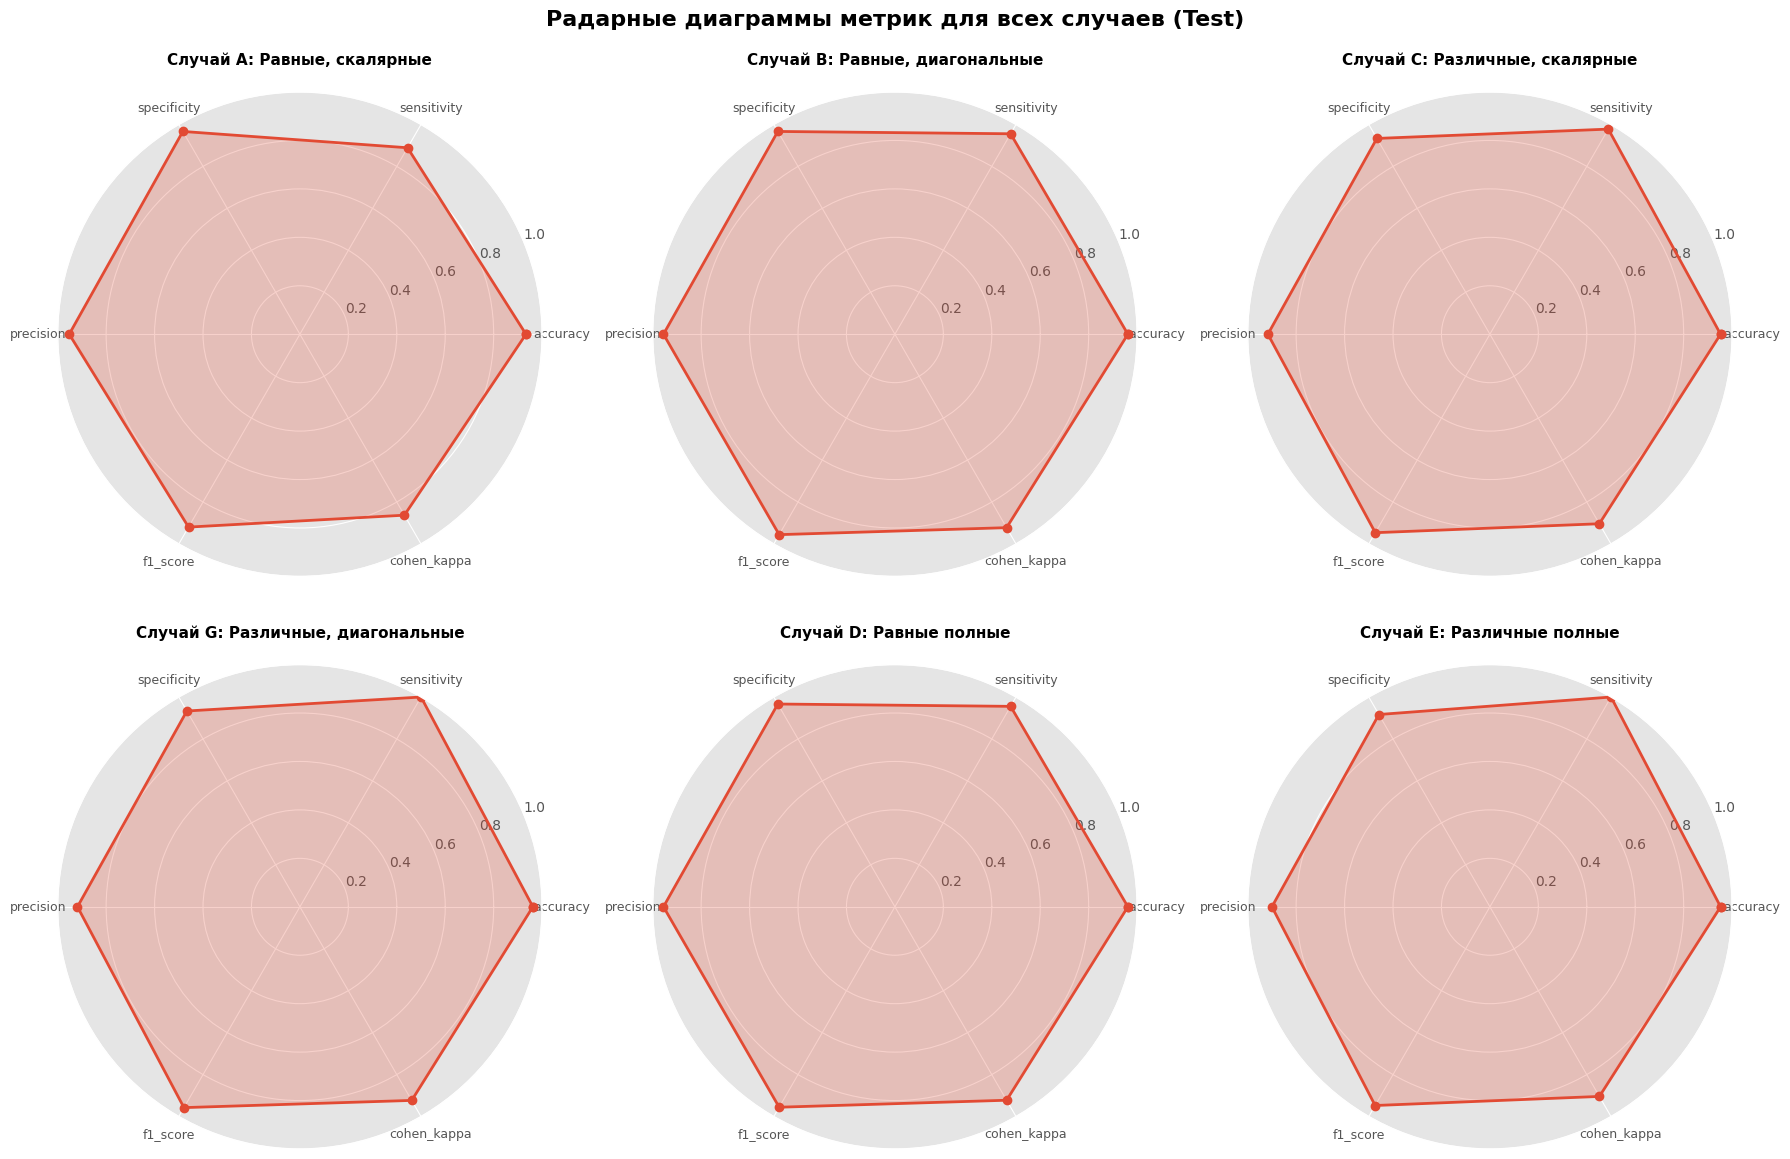

In [255]:
"""Радарные диаграммы метрик для всех случаев (Test)"""

metrics_to_plot = [
    "accuracy",
    "sensitivity",
    "specificity",
    "precision",
    "f1_score",
    "cohen_kappa",
]
fig, axes = plt.subplots(
    2,
    3,
    figsize=(18, 12),
    subplot_kw=dict(projection="polar"),
)
fig.suptitle(
    "Радарные диаграммы метрик для всех случаев (Test)",
    fontsize=16,
    fontweight="bold",
)
for idx, (case_id, case_data_dict) in enumerate(all_metrics.items()):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    metrics = case_data_dict["test"]

    # Значения метрик
    values = [metrics[m] for m in metrics_to_plot]
    values += values[:1]  # Замыкаем круг

    # Углы для каждой метрики
    angles = np.linspace(0, 2 * np.pi, len(metrics_to_plot), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

    # Рисуем радарную диаграмму
    ax.plot(angles, values, "o-", linewidth=2, label="Test")
    ax.fill(angles, values, alpha=0.25)

    # Настройка осей
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics_to_plot, fontsize=9)
    ax.set_ylim(0, 1)
    ax.set_title(
        f"Случай {case_id.upper()}: {CASES[case_id]['name']}",
        fontsize=11,
        fontweight="bold",
        pad=20,
    )
    ax.grid(True)

plt.tight_layout()
plt.savefig("metrics_radar_plots.png", dpi=300, bbox_inches="tight")
plt.show()

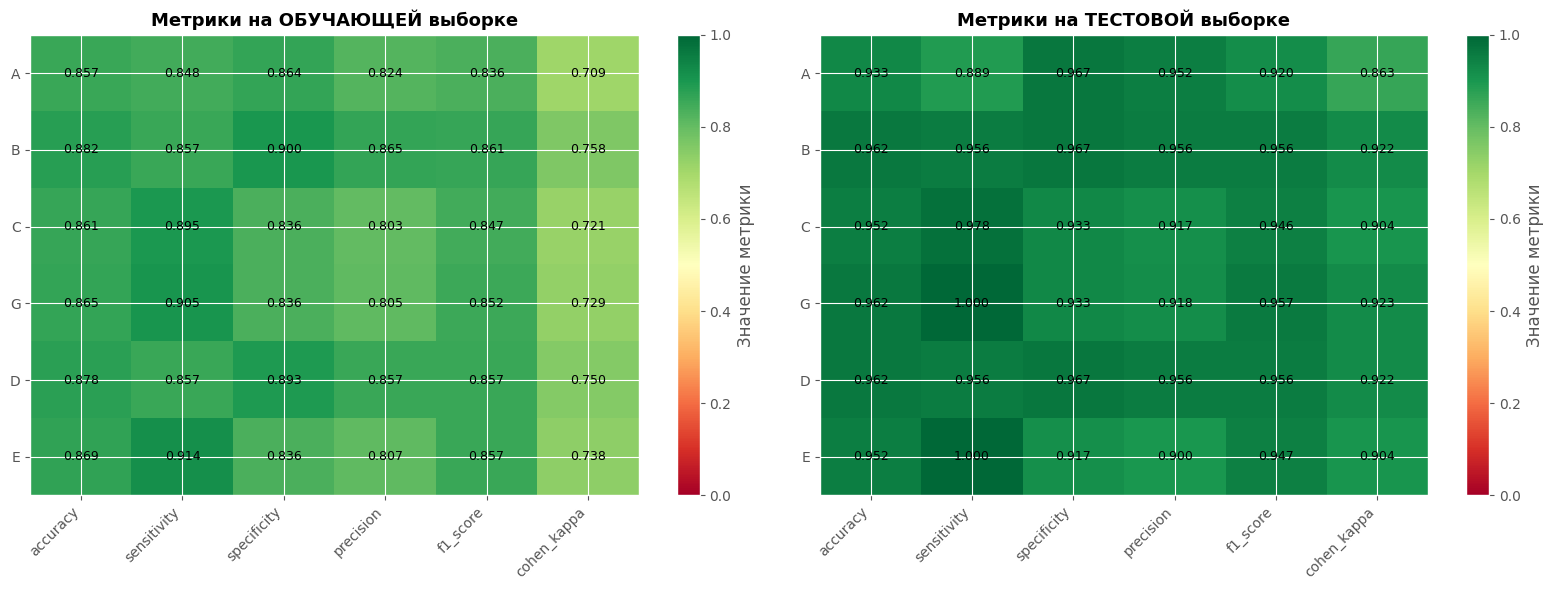

In [256]:
"""Heatmap метрик для всех случаев."""

metrics_names = [
    "accuracy",
    "sensitivity",
    "specificity",
    "precision",
    "f1_score",
    "cohen_kappa",
]

# Train метрики
train_matrix = []
for case_id in cases_list:
    row = [all_metrics[case_id]["train"][m] for m in metrics_names]
    train_matrix.append(row)

# Test метрики
test_matrix = []
for case_id in cases_list:
    row = [all_metrics[case_id]["test"][m] for m in metrics_names]
    test_matrix.append(row)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap для Train
im1 = ax1.imshow(train_matrix, cmap="RdYlGn", aspect="auto", vmin=0, vmax=1)
ax1.set_xticks(np.arange(len(metrics_names)))
ax1.set_yticks(np.arange(len(case_names)))
ax1.set_xticklabels(metrics_names, rotation=45, ha="right")
ax1.set_yticklabels(case_names)
ax1.set_title("Метрики на ОБУЧАЮЩЕЙ выборке", fontsize=13, fontweight="bold")

# Добавляем значения в ячейки
for i in range(len(case_names)):
    for j in range(len(metrics_names)):
        text = ax1.text(
            j,
            i,
            f"{train_matrix[i][j]:.3f}",
            ha="center",
            va="center",
            color="black",
            fontsize=9,
        )

plt.colorbar(im1, ax=ax1, label="Значение метрики")

# Heatmap для Test
im2 = ax2.imshow(test_matrix, cmap="RdYlGn", aspect="auto", vmin=0, vmax=1)
ax2.set_xticks(np.arange(len(metrics_names)))
ax2.set_yticks(np.arange(len(case_names)))
ax2.set_xticklabels(metrics_names, rotation=45, ha="right")
ax2.set_yticklabels(case_names)
ax2.set_title("Метрики на ТЕСТОВОЙ выборке", fontsize=13, fontweight="bold")


# Добавляем значения в ячейки
for i in range(len(case_names)):
    for j in range(len(metrics_names)):
        text = ax2.text(
            j,
            i,
            f"{test_matrix[i][j]:.3f}",
            ha="center",
            va="center",
            color="black",
            fontsize=9,
        )

plt.colorbar(im2, ax=ax2, label="Значение метрики")

plt.tight_layout()
plt.savefig("metrics_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


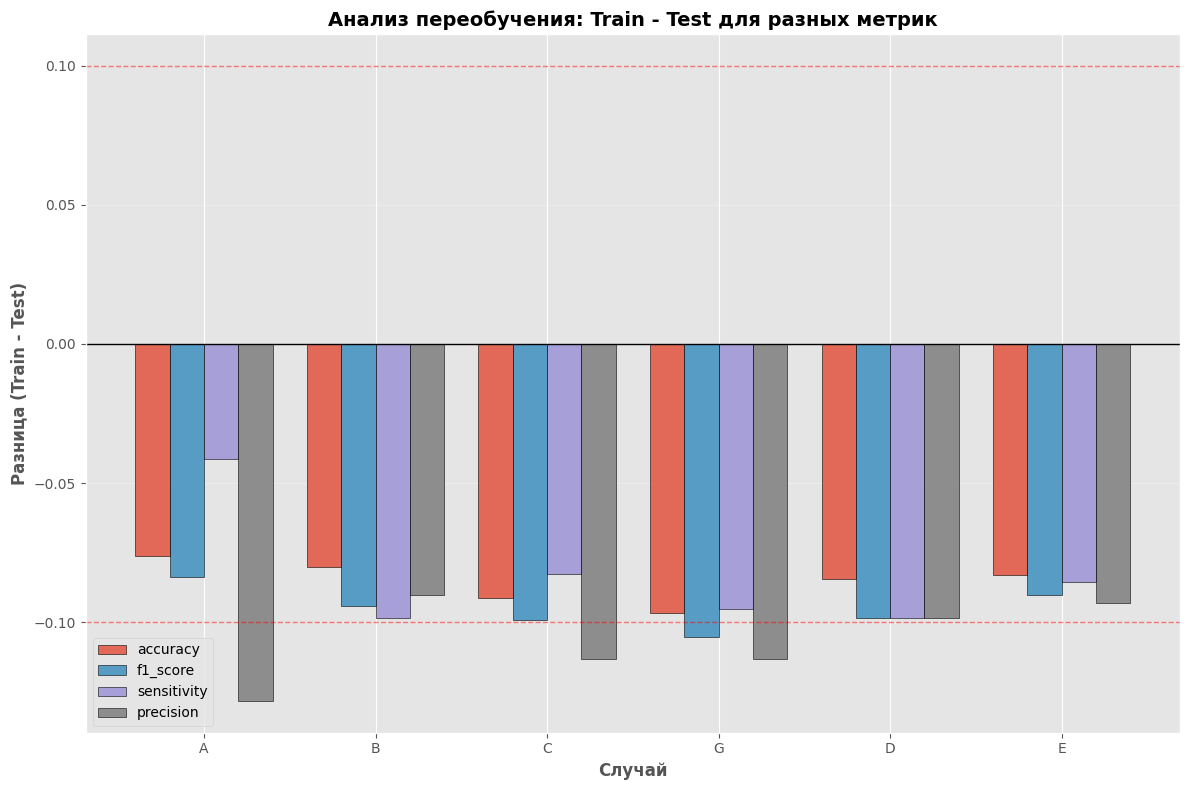

In [257]:
"""Анализ переобучения"""

metrics_for_overfitting = ["accuracy", "f1_score", "sensitivity", "precision"]

fig, ax = plt.subplots(figsize=(12, 8))

metrics_values = []

x_pos = np.arange(len(cases_list))
width = 0.2


for i, metric in enumerate(metrics_for_overfitting):
    differences = []
    for case_id in cases_list:
        diff = (
            all_metrics[case_id]["train"][metric] - all_metrics[case_id]["test"][metric]
        )
        differences.append(diff)

    ax.bar(
        x_pos + i * width,
        differences,
        width,
        label=metric,
        alpha=0.8,
        edgecolor="black",
    )

ax.set_xlabel("Случай", fontsize=12, fontweight="bold")
ax.set_ylabel("Разница (Train - Test)", fontsize=12, fontweight="bold")
ax.set_title(
    "Анализ переобучения: Train - Test для разных метрик",
    fontsize=14,
    fontweight="bold",
)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(case_names)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis="y")
ax.axhline(y=0, color="black", linestyle="-", linewidth=1)
ax.axhline(
    y=0.1,
    color="red",
    linestyle="--",
    linewidth=1,
    alpha=0.5,
    label="Порог переобучения (10%)",
)
ax.axhline(y=-0.1, color="red", linestyle="--", linewidth=1, alpha=0.5)

plt.tight_layout()
plt.savefig("metrics_overfitting_analysis.png", dpi=300, bbox_inches="tight")
plt.show()


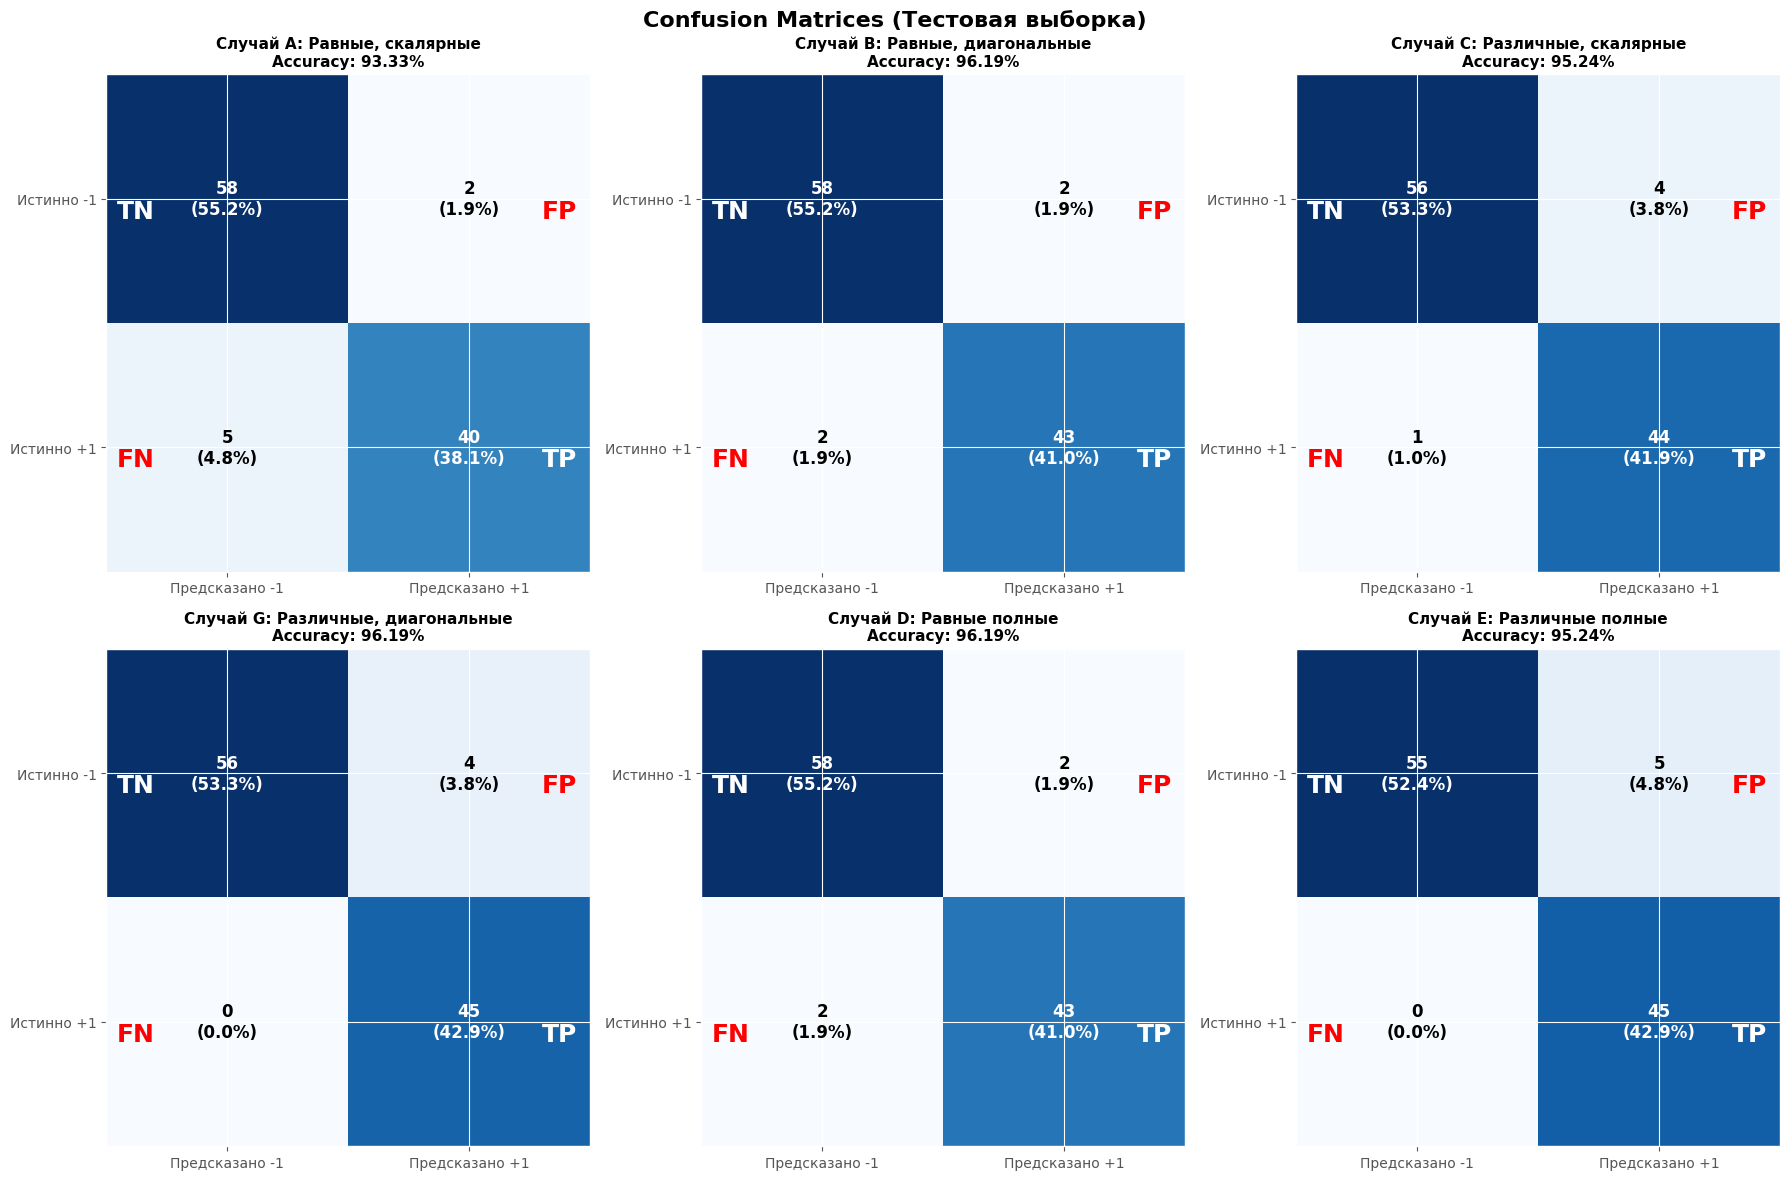

In [258]:
"""Матрица ошибок для всех случаев"""

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Confusion Matrices (Тестовая выборка)", fontsize=16, fontweight="bold")

for idx, (case_id, case_data_dict) in enumerate(all_metrics.items()):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    # Получаем компоненты confusion matrix
    metrics = case_data_dict["test"]
    cm = np.array([[metrics["TN"], metrics["FP"]], [metrics["FN"], metrics["TP"]]])

    # Рисуем heatmap
    im = ax.imshow(cm, cmap="Blues", aspect="auto")

    # Настройка осей
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["Предсказано -1", "Предсказано +1"])
    ax.set_yticklabels(["Истинно -1", "Истинно +1"])
    ax.set_title(
        f"Случай {case_id.upper()}: {CASES[case_id]['name']}\n"
        f"Accuracy: {metrics['accuracy'] * 100:.2f}%",
        fontsize=11,
        fontweight="bold",
    )

    # Добавляем значения и проценты
    total = cm.sum()
    for i in range(2):
        for j in range(2):
            text_val = f"{cm[i, j]}\n({cm[i, j] / total * 100:.1f}%)"
            ax.text(
                j,
                i,
                text_val,
                ha="center",
                va="center",
                color="white" if cm[i, j] > total / 4 else "black",
                fontsize=12,
                fontweight="bold",
            )

    ax.text(
        -0.3,
        0,
        "TN",
        ha="right",
        va="top",
        fontsize=18,
        fontweight="bold",
        color="white",
    )
    ax.text(
        -0.3,
        1,
        "FN",
        ha="right",
        va="top",
        fontsize=18,
        fontweight="bold",
        color="red",
    )
    ax.text(
        1.3,
        0,
        "FP",
        ha="left",
        va="top",
        fontsize=18,
        fontweight="bold",
        color="red",
    )
    ax.text(
        1.3,
        1,
        "TP",
        ha="left",
        va="top",
        fontsize=18,
        fontweight="bold",
        color="white",
    )

plt.tight_layout()
plt.savefig("confusion_matrices_all.png", dpi=300, bbox_inches="tight")
plt.show()


In [259]:
"""Ранжирование моделей по метрикам"""

ranking_data = []
for case_id in cases_list:
    metrics_test = all_metrics[case_id]["test"]
    ranking_data.append({
        "Случай": case_id.upper(),
        "Название": CASES[case_id]["name"],
        "Accuracy": metrics_test["accuracy"],
        "F1-Score": metrics_test["f1_score"],
        "Sensitivity": metrics_test["sensitivity"],
        "Specificity": metrics_test["specificity"],
    })

df_ranking = pd.DataFrame(ranking_data)

# Добавляем ранги (1 = лучший)
df_ranking["Rank_Acc"] = (
    df_ranking["Accuracy"].rank(ascending=False, method="min").astype(int)
)
df_ranking["Rank_F1"] = (
    df_ranking["F1-Score"].rank(ascending=False, method="min").astype(int)
)
df_ranking["Rank_Sens"] = (
    df_ranking["Sensitivity"].rank(ascending=False, method="min").astype(int)
)
df_ranking["Rank_Spec"] = (
    df_ranking["Specificity"].rank(ascending=False, method="min").astype(int)
)

# Средний ранг
df_ranking["Avg_Rank"] = (
    df_ranking["Rank_Acc"]
    + df_ranking["Rank_F1"]
    + df_ranking["Rank_Sens"]
    + df_ranking["Rank_Spec"]
) / 4

# Сортируем по среднему рангу
df_ranking = df_ranking.sort_values("Avg_Rank")

print("ИТОГОВОЕ РАНЖИРОВАНИЕ (по Test метрикам):")
print("=" * 80)
print(
    df_ranking[
        [
            "Случай",
            "Название",
            "Accuracy",
            "Sensitivity",
            "Specificity",
            "F1-Score",
            "Rank_Acc",
            "Rank_F1",
            "Rank_Sens",
            "Rank_Spec",
            "Avg_Rank",
        ]
    ].to_string(index=False)
)

df_ranking.to_csv("models_ranking.csv", index=False)
best_model = df_ranking.iloc[0]

print("\nЛучшая модель:")
print(f"Случай: {best_model['Случай']}")
print(f"Название: {best_model['Название']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"F1-Score: {best_model['F1-Score']:.4f}")
print(f"Sensitivity: {best_model['Sensitivity']:.4f}")
print(f"Specificity: {best_model['Specificity']:.4f}")


ИТОГОВОЕ РАНЖИРОВАНИЕ (по Test метрикам):
Случай                Название  Accuracy  Sensitivity  Specificity  F1-Score  Rank_Acc  Rank_F1  Rank_Sens  Rank_Spec  Avg_Rank
     G Различные, диагональные  0.961905     1.000000     0.933333  0.957447         1        1          1          4      1.75
     B    Равные, диагональные  0.961905     0.955556     0.966667  0.955556         1        2          4          1      2.00
     D           Равные полные  0.961905     0.955556     0.966667  0.955556         1        2          4          1      2.00
     E        Различные полные  0.952381     1.000000     0.916667  0.947368         4        4          1          6      3.75
     C    Различные, скалярные  0.952381     0.977778     0.933333  0.946237         4        5          3          4      4.00
     A       Равные, скалярные  0.933333     0.888889     0.966667  0.919540         6        6          6          1      4.75

Лучшая модель:
Случай: G
Название: Различные, диагональные
Ac

<h4>4. Построить ROC-кривые и PR-кривые и рассчитать ROC AUC и PR AUC на обучающей и тестовой выборках для случаев а)–е).</h4>


<b>ROC кривая — это график зависимости TPR (True Positive Rate) от FPR (False Positive Rate) при изменении порога классификации.</b>

- Ось $x$:

$$Fallout=\frac{FP} {TN+FP​}\$$

- Ось $y$:

$$Sensitivity=\frac{TP} {TP+FN​}\$$


<b>ROC AUC (Area Under Curve). ROC AUC — площадь под ROC кривой.</b>

AUC = вероятность того, что случайно выбранный положительный объект получит более высокий score, чем случайно выбранный отрицательный объект


<b>PR Кривая (Precision-Recall). PR кривая — это график зависимости Precision от Recall при изменении порога классификации.</b>

- Ось $x$:

$$Recall=\frac{TP} {TP+FN​}\$$

- Ось $y$:

$$Precision=\frac{TP} {TP+FP​}\$$

PR AUC (Area Under PR Curve) — площадь под PR кривой.


In [260]:
"""Вычисление классификиционных очков (scores) для ROC AUC и PR AUC"""

for case_id, case_data in CASES.items():
    print(f"{case_id.upper()}: {case_data['name']}")

    # score = d₋(x) - d₊(x)
    scores_train = case_data["train_dist_neg"] - case_data["train_dist_pos"]
    scores_test = case_data["test_dist_neg"] - case_data["test_dist_pos"]

    case_data["scores_train"] = scores_train
    case_data["scores_test"] = scores_test

    print(
        f"   Train: min={scores_train.min():.3f}, max={scores_train.max():.3f}, "
        f"mean={scores_train.mean():.3f}"
    )
    print(
        f"   Test:  min={scores_test.min():.3f}, max={scores_test.max():.3f}, "
        f"mean={scores_test.mean():.3f}\n"
    )

A: Равные, скалярные
   Train: min=-1.921, max=1.921, mean=-0.235
   Test:  min=-1.918, max=1.921, mean=-0.297

B: Равные, диагональные
   Train: min=-1.914, max=1.913, mean=-0.232
   Test:  min=-1.910, max=1.914, mean=-0.267

C: Различные, скалярные
   Train: min=-2.214, max=3.929, mean=0.201
   Test:  min=-2.267, max=3.444, mean=0.097

G: Различные, диагональные
   Train: min=-2.195, max=3.883, mean=0.225
   Test:  min=-2.244, max=3.458, mean=0.158

D: Равные полные
   Train: min=-1.505, max=1.502, mean=-0.159
   Test:  min=-1.502, max=1.505, mean=-0.206

E: Различные полные
   Train: min=-1.927, max=3.307, mean=0.237
   Test:  min=-1.983, max=2.971, mean=0.163



In [261]:
"""Построение ROC-кривых и PR-кривых"""

roc_pr_results = {}

for case_id, case_data in CASES.items():
    print(f"{case_id.upper()}: {case_data['name']}")

    # === ROC КРИВАЯ - TRAIN ===
    # y_true: истинные метки (1 для положительного класса)
    # y_score: предсказанные scores (больше = вероятнее положительный класс)
    fpr_train, tpr_train, thresholds_roc_train = roc_curve(
        y_train, case_data["scores_train"], pos_label=1
    )
    roc_auc_train = auc(fpr_train, tpr_train)

    # === ROC КРИВАЯ - TEST ===
    fpr_test, tpr_test, thresholds_roc_test = roc_curve(
        y_test, case_data["scores_test"], pos_label=1
    )
    roc_auc_test = auc(fpr_test, tpr_test)

    # === PR КРИВАЯ - TRAIN ===
    precision_train, recall_train, thresholds_pr_train = precision_recall_curve(
        y_train, case_data["scores_train"], pos_label=1
    )
    # PR AUC (Average Precision)
    pr_auc_train = average_precision_score(
        y_train, case_data["scores_train"], pos_label=1
    )

    # === PR КРИВАЯ - TEST ===
    precision_test, recall_test, thresholds_pr_test = precision_recall_curve(
        y_test, case_data["scores_test"], pos_label=1
    )
    pr_auc_test = average_precision_score(y_test, case_data["scores_test"], pos_label=1)

    roc_pr_results[case_id] = {
        "roc_train": {
            "fpr": fpr_train,
            "tpr": tpr_train,
            "auc": roc_auc_train,
            "thresholds": thresholds_roc_train,
        },
        "roc_test": {
            "fpr": fpr_test,
            "tpr": tpr_test,
            "auc": roc_auc_test,
            "thresholds": thresholds_roc_test,
        },
        "pr_train": {
            "precision": precision_train,
            "recall": recall_train,
            "auc": pr_auc_train,
            "thresholds": thresholds_pr_train,
        },
        "pr_test": {
            "precision": precision_test,
            "recall": recall_test,
            "auc": pr_auc_test,
            "thresholds": thresholds_pr_test,
        },
    }
    print(f"   ROC AUC:  Train={roc_auc_train:.4f}, Test={roc_auc_test:.4f}")
    print(f"   PR AUC:   Train={pr_auc_train:.4f}, Test={pr_auc_test:.4f}\n")

A: Равные, скалярные
   ROC AUC:  Train=0.9424, Test=0.9919
   PR AUC:   Train=0.9330, Test=0.9894

B: Равные, диагональные
   ROC AUC:  Train=0.9444, Test=0.9967
   PR AUC:   Train=0.9367, Test=0.9957

C: Различные, скалярные
   ROC AUC:  Train=0.9416, Test=0.9933
   PR AUC:   Train=0.9343, Test=0.9913

G: Различные, диагональные
   ROC AUC:  Train=0.9446, Test=0.9970
   PR AUC:   Train=0.9390, Test=0.9962

D: Равные полные
   ROC AUC:  Train=0.9433, Test=0.9959
   PR AUC:   Train=0.9334, Test=0.9946

E: Различные полные
   ROC AUC:  Train=0.9458, Test=0.9974
   PR AUC:   Train=0.9399, Test=0.9967



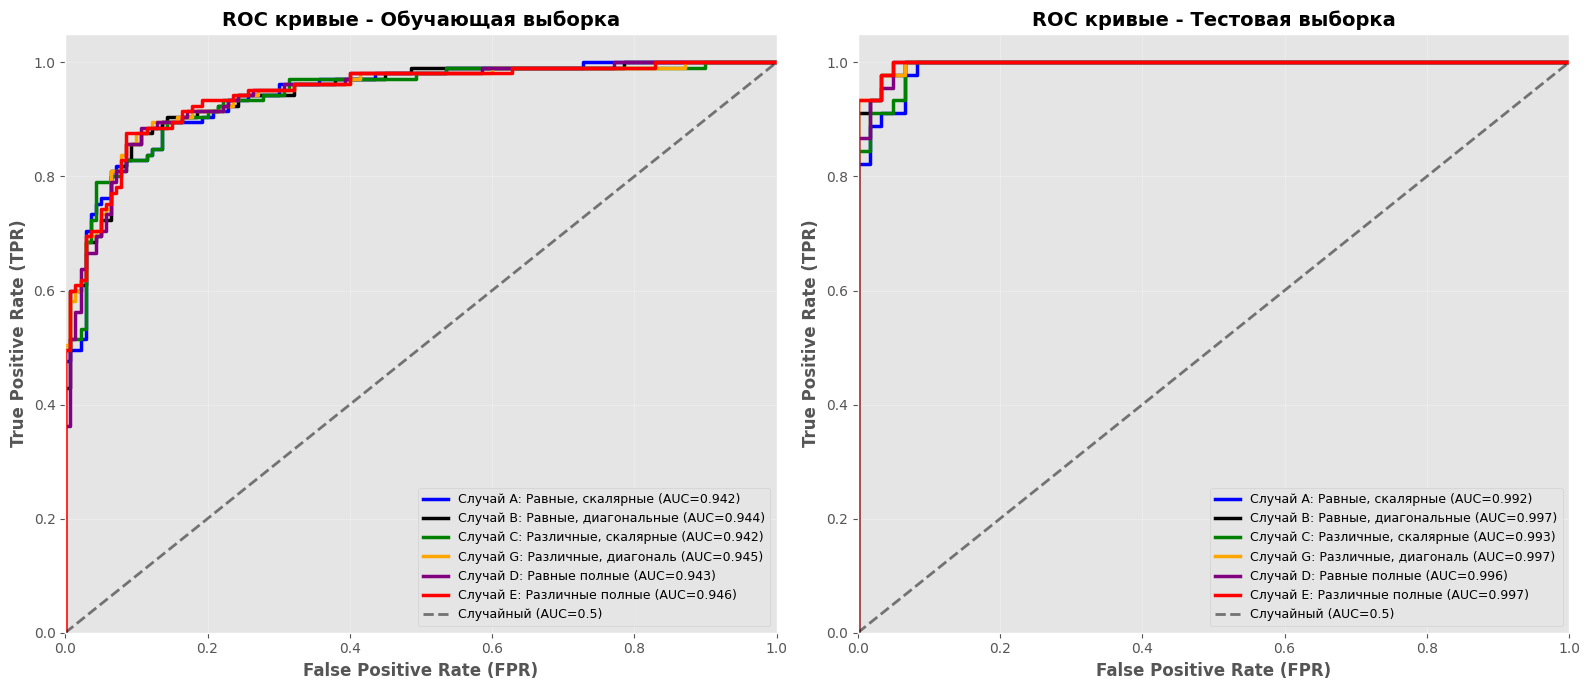

In [262]:
"""Визуализация ROC-кривых"""

# === ГРАФИК 1: ROC кривые на обучающей выборке ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

for case_id, results in roc_pr_results.items():
    roc_data = results["roc_train"]
    ax1.plot(
        roc_data["fpr"],
        roc_data["tpr"],
        color=COLORS[case_id],
        linewidth=2.5,
        label=f"Случай {case_id.upper()}: {CASES[case_id]['name'][:20]} "
        f"(AUC={roc_data['auc']:.3f})",
    )

# Диагональ (случайный классификатор)
ax1.plot([0, 1], [0, 1], "k--", linewidth=2, label="Случайный (AUC=0.5)", alpha=0.5)

ax1.set_xlabel("False Positive Rate (FPR)", fontsize=12, fontweight="bold")
ax1.set_ylabel("True Positive Rate (TPR)", fontsize=12, fontweight="bold")
ax1.set_title("ROC кривые - Обучающая выборка", fontsize=14, fontweight="bold")
ax1.legend(loc="lower right", fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])

# === ГРАФИК 2: ROC кривые на тестовой выборке ===
for case_id, results in roc_pr_results.items():
    roc_data = results["roc_test"]
    ax2.plot(
        roc_data["fpr"],
        roc_data["tpr"],
        color=COLORS[case_id],
        linewidth=2.5,
        label=f"Случай {case_id.upper()}: {CASES[case_id]['name'][:20]} "
        f"(AUC={roc_data['auc']:.3f})",
    )

ax2.plot([0, 1], [0, 1], "k--", linewidth=2, label="Случайный (AUC=0.5)", alpha=0.5)

ax2.set_xlabel("False Positive Rate (FPR)", fontsize=12, fontweight="bold")
ax2.set_ylabel("True Positive Rate (TPR)", fontsize=12, fontweight="bold")
ax2.set_title("ROC кривые - Тестовая выборка", fontsize=14, fontweight="bold")
ax2.legend(loc="lower right", fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])

plt.tight_layout()
plt.savefig("roc_curves_all_cases.png", dpi=300, bbox_inches="tight")
plt.show()

Baseline Precision (доля класса +1):
   Train: 0.4286 (42.86%)
   Test:  0.4286 (42.86%)



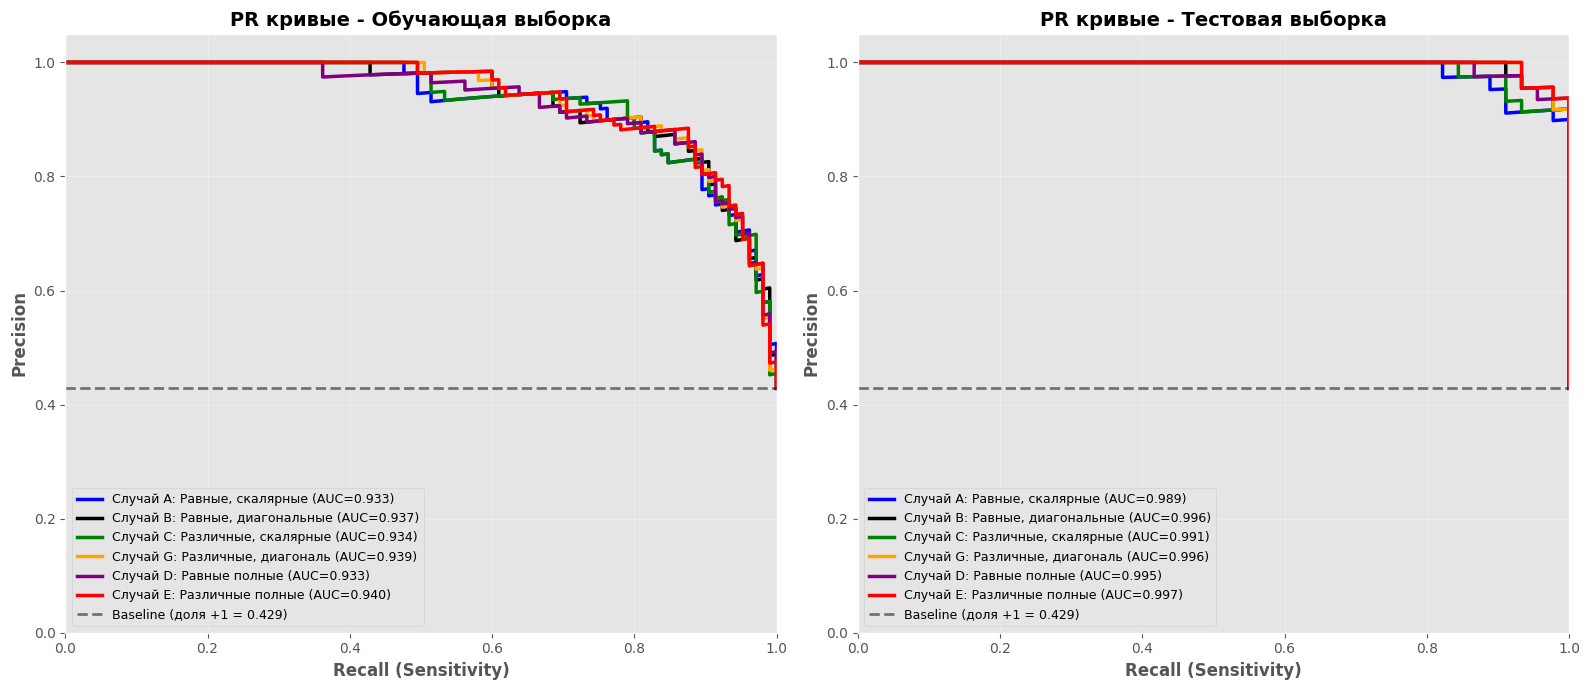

In [263]:
"""Визуализация PR-кривых"""

baseline_train = np.sum(y_train == 1) / len(y_train)
baseline_test = np.sum(y_test == 1) / len(y_test)

print(f"Baseline Precision (доля класса +1):")
print(f"   Train: {baseline_train:.4f} ({baseline_train * 100:.2f}%)")
print(f"   Test:  {baseline_test:.4f} ({baseline_test * 100:.2f}%)\n")


# === ГРАФИК 1: PR кривые на обучающей выборке ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

for case_id, results in roc_pr_results.items():
    pr_data = results["pr_train"]
    ax1.plot(
        pr_data["recall"],
        pr_data["precision"],
        color=COLORS[case_id],
        linewidth=2.5,
        label=f"Случай {case_id.upper()}: {CASES[case_id]['name'][:20]} "
        f"(AUC={pr_data['auc']:.3f})",
    )

# Baseline (доля положительного класса)
ax1.axhline(
    y=baseline_train,
    color="k",
    linestyle="--",
    linewidth=2,
    label=f"Baseline (доля +1 = {baseline_train:.3f})",
    alpha=0.5,
)

ax1.set_xlabel("Recall (Sensitivity)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Precision", fontsize=12, fontweight="bold")
ax1.set_title("PR кривые - Обучающая выборка", fontsize=14, fontweight="bold")
ax1.legend(loc="best", fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])

# === ГРАФИК 2: PR кривые на тестовой выборке ===
for case_id, results in roc_pr_results.items():
    pr_data = results["pr_test"]
    ax2.plot(
        pr_data["recall"],
        pr_data["precision"],
        color=COLORS[case_id],
        linewidth=2.5,
        label=f"Случай {case_id.upper()}: {CASES[case_id]['name'][:20]} "
        f"(AUC={pr_data['auc']:.3f})",
    )

ax2.axhline(
    y=baseline_test,
    color="k",
    linestyle="--",
    linewidth=2,
    label=f"Baseline (доля +1 = {baseline_test:.3f})",
    alpha=0.5,
)

ax2.set_xlabel("Recall (Sensitivity)", fontsize=12, fontweight="bold")
ax2.set_ylabel("Precision", fontsize=12, fontweight="bold")
ax2.set_title("PR кривые - Тестовая выборка", fontsize=14, fontweight="bold")
ax2.legend(loc="best", fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])

plt.tight_layout()
plt.savefig("pr_curves_all_cases.png", dpi=300, bbox_inches="tight")
plt.show()

In [264]:
"""Графики для каждого случая"""

for case_id, results in roc_pr_results.items():
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    fig.suptitle(
        f"Случай {case_id.upper()}: {CASES[case_id]['name']}",
        fontsize=16,
        fontweight="bold",
    )

    # === ROC TRAIN ===
    ax = axes[0, 0]
    roc_train = results["roc_train"]
    ax.plot(roc_train["fpr"], roc_train["tpr"], color=COLORS[case_id], linewidth=3)
    ax.plot([0, 1], [0, 1], "k--", linewidth=2, alpha=0.5)
    ax.fill_between(
        roc_train["fpr"], roc_train["tpr"], alpha=0.2, color=COLORS[case_id]
    )
    ax.set_xlabel("FPR", fontsize=11, fontweight="bold")
    ax.set_ylabel("TPR", fontsize=11, fontweight="bold")
    ax.set_title(
        f"ROC - Train (AUC={roc_train['auc']:.4f})", fontsize=12, fontweight="bold"
    )
    ax.grid(True, alpha=0.3)

    # === ROC TEST ===
    ax = axes[0, 1]
    roc_test = results["roc_test"]
    ax.plot(roc_test["fpr"], roc_test["tpr"], color=COLORS[case_id], linewidth=3)
    ax.plot([0, 1], [0, 1], "k--", linewidth=2, alpha=0.5)
    ax.fill_between(roc_test["fpr"], roc_test["tpr"], alpha=0.2, color=COLORS[case_id])
    ax.set_xlabel("FPR", fontsize=11, fontweight="bold")
    ax.set_ylabel("TPR", fontsize=11, fontweight="bold")
    ax.set_title(
        f"ROC - Test (AUC={roc_test['auc']:.4f})", fontsize=12, fontweight="bold"
    )
    ax.grid(True, alpha=0.3)

    # === PR TRAIN ===
    ax = axes[1, 0]
    pr_train = results["pr_train"]
    ax.plot(
        pr_train["recall"], pr_train["precision"], color=COLORS[case_id], linewidth=3
    )
    ax.axhline(y=baseline_train, color="k", linestyle="--", linewidth=2, alpha=0.5)
    ax.fill_between(
        pr_train["recall"], pr_train["precision"], alpha=0.2, color=COLORS[case_id]
    )
    ax.set_xlabel("Recall", fontsize=11, fontweight="bold")
    ax.set_ylabel("Precision", fontsize=11, fontweight="bold")
    ax.set_title(
        f"PR - Train (AUC={pr_train['auc']:.4f})", fontsize=12, fontweight="bold"
    )
    ax.grid(True, alpha=0.3)

    # === PR TEST ===
    ax = axes[1, 1]
    pr_test = results["pr_test"]
    ax.plot(pr_test["recall"], pr_test["precision"], color=COLORS[case_id], linewidth=3)
    ax.axhline(y=baseline_test, color="k", linestyle="--", linewidth=2, alpha=0.5)
    ax.fill_between(
        pr_test["recall"], pr_test["precision"], alpha=0.2, color=COLORS[case_id]
    )
    ax.set_xlabel("Recall", fontsize=11, fontweight="bold")
    ax.set_ylabel("Precision", fontsize=11, fontweight="bold")
    ax.set_title(
        f"PR - Test (AUC={pr_test['auc']:.4f})", fontsize=12, fontweight="bold"
    )
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f"roc_pr_case_{case_id}_detailed.png", dpi=300, bbox_inches="tight")
    plt.close()

In [265]:
"""Таблица"""

auc_data = []

for case_id, results in roc_pr_results.items():
    auc_data.append({
        "Случай": case_id.upper(),
        "Название": CASES[case_id]["name"],
        "ROC AUC Train": f"{results['roc_train']['auc']:.4f}",
        "ROC AUC Test": f"{results['roc_test']['auc']:.4f}",
        "PR AUC Train": f"{results['pr_train']['auc']:.4f}",
        "PR AUC Test": f"{results['pr_test']['auc']:.4f}",
    })

df_auc = pd.DataFrame(auc_data)
print(df_auc.to_string(index=False))
df_auc.to_csv("auc_metrics_summary.csv", index=False)

Случай                Название ROC AUC Train ROC AUC Test PR AUC Train PR AUC Test
     A       Равные, скалярные        0.9424       0.9919       0.9330      0.9894
     B    Равные, диагональные        0.9444       0.9967       0.9367      0.9957
     C    Различные, скалярные        0.9416       0.9933       0.9343      0.9913
     G Различные, диагональные        0.9446       0.9970       0.9390      0.9962
     D           Равные полные        0.9433       0.9959       0.9334      0.9946
     E        Различные полные        0.9458       0.9974       0.9399      0.9967


<h4>5. Сделать выводы о влиянии предположений о модели обучающих данных на точность классификации по расстоянию Махаланобиса.</h4>


In [267]:
"""Сбор всех метрик в таблицу"""

final_results = []

for case_id in CASES.keys():
    # Базовая информация
    case_info = {
        "Случай": case_id.upper(),
        "Название": CASES[case_id]["name"],
    }

    # Характеристики модели
    is_equal = np.allclose(
        CASES[case_id]["Sigma_negative"], CASES[case_id]["Sigma_positive"]
    )
    case_info["border_type"] = "Линейная" if is_equal else "Квадратичная"

    # Определяем тип матрицы
    sigma = CASES[case_id]["Sigma_negative"]
    is_scalar = np.allclose(sigma[0, 0], sigma[1, 1]) and np.allclose(sigma[0, 1], 0)
    is_diagonal = np.allclose(sigma[0, 1], 0) and np.allclose(sigma[1, 0], 0)

    if is_scalar:
        matrix_type = "Скалярная"
    elif is_diagonal:
        matrix_type = "Диагональная"
    else:
        matrix_type = "Полная"

    case_info["matrix_type"] = matrix_type
    case_info["is_equal"] = "Да" if is_equal else "Нет"

    # Метрики из Задания 3
    if case_id in all_metrics:
        metrics_train = all_metrics[case_id]["train"]
        metrics_test = all_metrics[case_id]["test"]

        case_info["accuracy_train"] = metrics_train["accuracy"]
        case_info["accuracy_test"] = metrics_test["accuracy"]
        case_info["f1_score_train"] = metrics_train["f1_score"]
        case_info["f1_score_test"] = metrics_test["f1_score"]
        case_info["sensitivity_test"] = metrics_test["sensitivity"]
        case_info["specificity_test"] = metrics_test["specificity"]
        case_info["precision_test"] = metrics_test["precision"]
        case_info["cohen_kappa_test"] = metrics_test["cohen_kappa"]

    # Метрики из Задания 4
    if case_id in roc_pr_results:
        case_info["roc_auc_train"] = roc_pr_results[case_id]["roc_train"]["auc"]
        case_info["roc_auc_test"] = roc_pr_results[case_id]["roc_test"]["auc"]
        case_info["pr_auc_train"] = roc_pr_results[case_id]["pr_train"]["auc"]
        case_info["pr_auc_test"] = roc_pr_results[case_id]["pr_test"]["auc"]

    case_info["delta_accuracy"] = (
        case_info["accuracy_train"] - case_info["accuracy_test"]
    )
    case_info["delta_roc_auc"] = case_info["roc_auc_train"] - case_info["roc_auc_test"]

    final_results.append(case_info)

df_final = pd.DataFrame(final_results)

print("=" * 80)
print(
    df_final[
        [
            "Случай",
            "Название",
            "border_type",
            "matrix_type",
            "accuracy_test",
            "roc_auc_test",
        ]
    ].to_string(index=False)
)
print("=" * 80 + "\n")

df_final.to_csv("overall_results.csv", index=False)

Случай                Название  border_type  matrix_type  accuracy_test  roc_auc_test
     A       Равные, скалярные     Линейная    Скалярная       0.933333      0.991852
     B    Равные, диагональные     Линейная Диагональная       0.961905      0.996667
     C    Различные, скалярные Квадратичная    Скалярная       0.952381      0.993333
     G Различные, диагональные Квадратичная Диагональная       0.961905      0.997037
     D           Равные полные     Линейная       Полная       0.961905      0.995926
     E        Различные полные Квадратичная       Полная       0.952381      0.997407



In [ ]:
"""Сравнение результатов"""

linear_cases = df_final[df_final["border_type"] == "Линейная"]
quadratic_cases = df_final[df_final["border_type"] == "Квадратичная"]

print("- ЛИНЕЙНЫЕ МОДЕЛИ (Σ₁ = Σ₂):")
print(f"   Случаи: {', '.join(linear_cases['Случай'].values)}")
print(f"   Средний Accuracy: {linear_cases['accuracy_test'].mean():.4f}")
print(f"   Средний ROC AUC: {linear_cases['roc_auc_test'].mean():.4f}")
print(f"   Среднее переобучение: {linear_cases['delta_accuracy'].mean():.4f}\n")

print("- КВАДРАТИЧНЫЕ МОДЕЛИ (Σ₁ ≠ Σ₂):")
print(f"   Случаи: {', '.join(quadratic_cases['Случай'].values)}")
print(f"   Средний Accuracy: {quadratic_cases['accuracy_test'].mean():.4f}")
print(f"   Средний ROC AUC: {quadratic_cases['roc_auc_test'].mean():.4f}")
print(f"   Среднее переобучение: {quadratic_cases['delta_accuracy'].mean():.4f}\n")


- ЛИНЕЙНЫЕ МОДЕЛИ (Σ₁ = Σ₂):
   Случаи: A, B, D
   Средний Accuracy: 0.9524
   Средний ROC AUC: 0.9948
   Среднее переобучение: -0.0803

- КВАДРАТИЧНЫЕ МОДЕЛИ (Σ₁ ≠ Σ₂):
   Случаи: C, G, E
   Средний Accuracy: 0.9556
   Средний ROC AUC: 0.9959
   Среднее переобучение: -0.0902



In [ ]:
diff_accuracy = (
    quadratic_cases["accuracy_test"].mean() - linear_cases["accuracy_test"].mean()
)
print(f"Разница в Accuracy: {diff_accuracy:.4f} ({diff_accuracy * 100:.2f}%)")

if abs(diff_accuracy) > 0.05:
    print("   - Разница ЗНАЧИМА (>5%)")
    if diff_accuracy > 0:
        print("   - Квадратичные модели ЛУЧШЕ для этих данных")
    else:
        print("   - Линейные модели достаточны для этих данных")
else:
    print("   - Разница незначительна (<5%)")
    print("   => По принципу Оккама, выбираем ЛИНЕЙНУЮ модель")

Разница в Accuracy: 0.0032 (0.32%)
   - Разница незначительна (<5%)
   => По принципу Оккама, выбираем ЛИНЕЙНУЮ модель


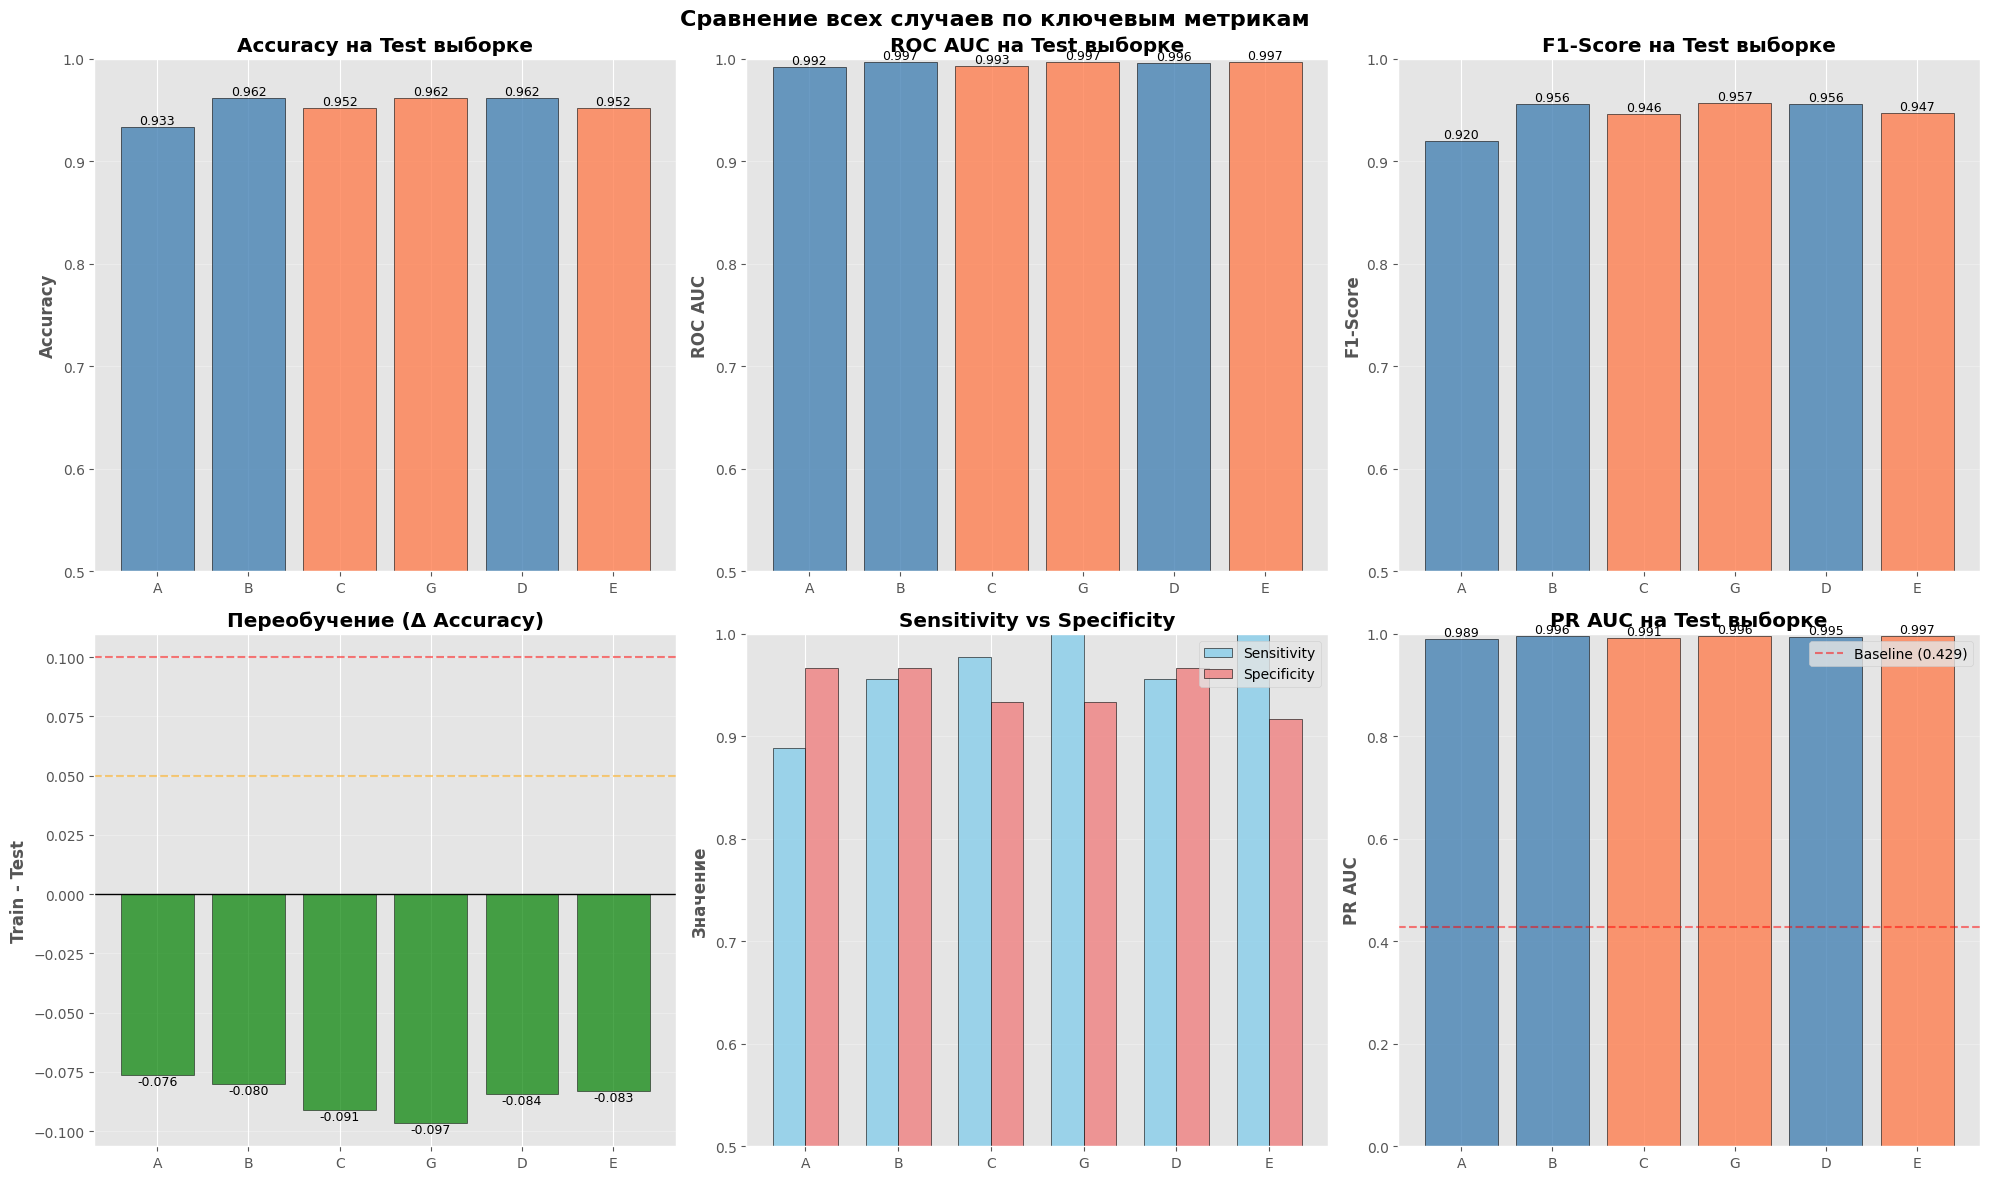

In [ ]:
"""Визуализация"""

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle(
    "Сравнение всех случаев по ключевым метрикам",
    fontsize=16,
    fontweight="bold",
)

cases_list = df_final["Случай"].values
colors_bars = [
    "steelblue" if t == "Линейная" else "coral" for t in df_final["border_type"].values
]

# График 1: Accuracy Test
ax = axes[0, 0]
bars = ax.bar(
    cases_list,
    df_final["accuracy_test"],
    color=colors_bars,
    alpha=0.8,
    edgecolor="black",
)
ax.set_ylabel("Accuracy", fontweight="bold")
ax.set_title("Accuracy на Test выборке", fontweight="bold")
ax.grid(True, alpha=0.3, axis="y")
ax.set_ylim([0.5, 1.0])
for bar, val in zip(bars, df_final["accuracy_test"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        val,
        f"{val:.3f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

# График 2: ROC AUC Test
ax = axes[0, 1]
bars = ax.bar(
    cases_list,
    df_final["roc_auc_test"],
    color=colors_bars,
    alpha=0.8,
    edgecolor="black",
)
ax.set_ylabel("ROC AUC", fontweight="bold")
ax.set_title("ROC AUC на Test выборке", fontweight="bold")
ax.grid(True, alpha=0.3, axis="y")
ax.set_ylim([0.5, 1.0])
for bar, val in zip(bars, df_final["roc_auc_test"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        val,
        f"{val:.3f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

# График 3: F1-Score Test
ax = axes[0, 2]
bars = ax.bar(
    cases_list,
    df_final["f1_score_test"],
    color=colors_bars,
    alpha=0.8,
    edgecolor="black",
)
ax.set_ylabel("F1-Score", fontweight="bold")
ax.set_title("F1-Score на Test выборке", fontweight="bold")
ax.grid(True, alpha=0.3, axis="y")
ax.set_ylim([0.5, 1.0])
for bar, val in zip(bars, df_final["f1_score_test"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        val,
        f"{val:.3f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

# График 4: Переобучение Accuracy
ax = axes[1, 0]
colors_overfit = [
    "green" if d < 0.05 else "orange" if d < 0.10 else "red"
    for d in df_final["delta_accuracy"]
]
bars = ax.bar(
    cases_list,
    df_final["delta_accuracy"],
    color=colors_overfit,
    alpha=0.7,
    edgecolor="black",
)
ax.axhline(y=0, color="black", linestyle="-", linewidth=1)
ax.axhline(y=0.05, color="orange", linestyle="--", alpha=0.5)
ax.axhline(y=0.10, color="red", linestyle="--", alpha=0.5)
ax.set_ylabel("Train - Test", fontweight="bold")
ax.set_title("Переобучение (Δ Accuracy)", fontweight="bold")
ax.grid(True, alpha=0.3, axis="y")
for bar, val in zip(bars, df_final["delta_accuracy"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        val,
        f"{val:.3f}",
        ha="center",
        va="bottom" if val > 0 else "top",
        fontsize=9,
    )

# График 5: Sensitivity vs Specificity
ax = axes[1, 1]
x = np.arange(len(cases_list))
width = 0.35
bars1 = ax.bar(
    x - width / 2,
    df_final["sensitivity_test"],
    width,
    label="Sensitivity",
    color="skyblue",
    alpha=0.8,
    edgecolor="black",
)
bars2 = ax.bar(
    x + width / 2,
    df_final["specificity_test"],
    width,
    label="Specificity",
    color="lightcoral",
    alpha=0.8,
    edgecolor="black",
)
ax.set_xticks(x)
ax.set_xticklabels(cases_list)
ax.set_ylabel("Значение", fontweight="bold")
ax.set_title("Sensitivity vs Specificity", fontweight="bold")
ax.legend()
ax.grid(True, alpha=0.3, axis="y")
ax.set_ylim([0.5, 1.0])

# График 6: PR AUC Test
ax = axes[1, 2]
bars = ax.bar(
    cases_list,
    df_final["pr_auc_test"],
    color=colors_bars,
    alpha=0.8,
    edgecolor="black",
)
ax.axhline(
    y=baseline_test,
    color="red",
    linestyle="--",
    alpha=0.5,
    label=f"Baseline ({baseline_test:.3f})",
)
ax.set_ylabel("PR AUC", fontweight="bold")
ax.set_title("PR AUC на Test выборке", fontweight="bold")
ax.legend()
ax.grid(True, alpha=0.3, axis="y")
ax.set_ylim([0, 1.0])
for bar, val in zip(bars, df_final["pr_auc_test"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        val,
        f"{val:.3f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()
plt.savefig("final_comparison.png", dpi=300, bbox_inches="tight")
plt.show()
